### I am looking for predictors of mortality of children under 5 years old. From the begging, I know I will have problems with multicolinearity, because all the predictors will be correlated to poverty - poorer countries have less food, worse health conditions, less access to water and sanitation etc. That is why I will mainly focus on the best predictors of child mortality.

In [1]:
# Importing the packages

import numpy as np
import scipy.stats as stats
import pandas as pd
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')

In [2]:
# Importing the dataset

data_path = 'C:/Users/Boris/Desktop/Project2/World_Bank/WDI_cleaner/full_dataset.dta'

df = pd.read_stata(data_path)

df.head(3)

time timecode  countryname countrycode  debtforgivenessgrantscurrentus  \
0  1990   YR1990  Afghanistan         AFG                         70000.0   
1  1991   YR1991  Afghanistan         AFG                         80000.0   
2  1992   YR1992  Afghanistan         AFG                         70000.0   

   gdppercapitapppconstant2011inter  gdppercapitapppcurrentinternatio  \
0                               NaN                               NaN   
1                               NaN                               NaN   
2                               NaN                               NaN   

   gdppppconstant2011international  gdppppcurrentinternational  \
0                              NaN                         NaN   
1                              NaN                         NaN   
2                              NaN                         NaN   

   householdfinalconsumptionexpendi                ...                 \
0                               NaN                ...                  
1                               NaN                ...                  
2                               NaN                ...                  

   prevalenceofanemiaamongwomenofre  prevalenceofhivfemaleages1524  \
0                               NaN                            0.1   
1                               NaN                            0.1   
2                               NaN                            0.1   

   prevalenceofhivmaleages1524  prevalenceofhivtotalofpopulation  \
0                          0.1                               0.1   
1                          0.1                               0.1   
2                          0.1                               0.1   

   prevalenceofundernourishmentofpo  survivaltoage65femaleofcohort  \
0                               NaN                      44.991390   
1                         29.500000                      46.171921   
2                         35.599998                      47.352451   

   survivaltoage65maleofcohort  tuberculosiscasedetectionrateall  \
0                    39.828770                               NaN   
1                    40.929562                               NaN   
2                    42.030338                               NaN   

   tuberculosistreatmentsuccessrate  womensshareofpopulationages15liv  
0                               NaN                         23.098591  
1                               NaN                         23.605150  
2                               NaN                         24.000000  

[3 rows x 226 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7128 entries, 0 to 7127
Columns: 226 entries, time to womensshareofpopulationages15liv
dtypes: float32(186), float64(36), int16(1), object(3)
memory usage: 7.2+ MB


In [4]:
df.isnull().sum()

time                                   0
timecode                               0
countryname                            0
countrycode                            0
debtforgivenessgrantscurrentus      5349
gdppercapitapppconstant2011inter    1153
gdppercapitapppcurrentinternatio    1174
gdppppconstant2011international     1150
gdppppcurrentinternational          1171
householdfinalconsumptionexpendi    2476
v11                                 2205
idagrantscurrentus                  3697
netbilateralaidflowsfromdacdonor    2032
netodareceivedpercapitacurrentus    2401
netofficialdevelopmentassistance    2043
v16                                 2042
v17                                 2395
v18                                 2395
netofficialflowsfromunagenciesun    2530
v20                                 2930
v21                                 3983
v22                                 3186
v23                                 3198
netofficialflowsfromunagencieswf    4160
accesstoelectric

In [5]:
# Setting the country name as an index

df = df.set_index(['countryname'])

In [6]:
# deleting timecode and country code and replacing missing values with means within a country

del df['timecode']
del df['countrycode']

columns = df.columns.values

for column in columns:
    df[column] = df.groupby(level=0)[column].transform(lambda x: x.fillna(x.mean()))

In [7]:
pd.set_option('display.max_rows', 400)

df.isnull().sum()

time                                   0
debtforgivenessgrantscurrentus      4212
gdppercapitapppconstant2011inter     621
gdppercapitapppcurrentinternatio     621
gdppppconstant2011international      621
gdppppcurrentinternational           621
householdfinalconsumptionexpendi    1215
v11                                 1026
idagrantscurrentus                  3483
netbilateralaidflowsfromdacdonor    1161
netodareceivedpercapitacurrentus    1431
netofficialdevelopmentassistance    1161
v16                                 1161
v17                                 1431
v18                                 1431
netofficialflowsfromunagenciesun    1269
v20                                 1620
v21                                 2430
v22                                 2295
v23                                 1242
netofficialflowsfromunagencieswf    2592
accesstoelectricityofpopulatione     162
accesstoelectricityruralofruralp     162
accesstoelectricityurbanofurbanp     162
accesstononsolid

In [8]:
# dropping all the columns that have more than 1000 missing values

df.dropna(thresh=len(df) - 1000, axis=1, inplace=True)

In [9]:
df.isnull().sum()

time                                  0
gdppercapitapppconstant2011inter    621
gdppercapitapppcurrentinternatio    621
gdppppconstant2011international     621
gdppppcurrentinternational          621
accesstoelectricityofpopulatione    162
accesstoelectricityruralofruralp    162
accesstoelectricityurbanofurbanp    162
accesstononsolidfuelofpopulation    729
accesstononsolidfuelruralofrural    729
accesstononsolidfuelurbanofurban    729
agriculturallandoflandareaaglnda    216
agriculturallandsqkmaglndagrik2     189
agriculturalmethaneemissionsofto    378
agriculturalmethaneemissionsthou     27
agriculturalnitrousoxideemission    351
v19                                  27
aquacultureproductionmetrictonse    783
arablelandoflandareaaglndarblzs     270
arablelandhectaresperpersonaglnd    270
birdspeciesthreatenedenbirthrdno     81
capturefisheriesproductionmetric    189
co2emissionskgper2010usofgdpenat    648
co2emissionskgper2011pppofgdpena    729
co2emissionskgperpppofgdpenatmco    729


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7128 entries, Afghanistan to Zimbabwe
Columns: 130 entries, time to tuberculosiscasedetectionrateall
dtypes: float32(119), float64(10), int16(1)
memory usage: 3.8+ MB


In [11]:
df.dropna(inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3861 entries, Afghanistan to Zimbabwe
Columns: 130 entries, time to tuberculosiscasedetectionrateall
dtypes: float32(119), float64(10), int16(1)
memory usage: 2.1+ MB


In [13]:
df.isnull().sum()

time                                0
gdppercapitapppconstant2011inter    0
gdppercapitapppcurrentinternatio    0
gdppppconstant2011international     0
gdppppcurrentinternational          0
accesstoelectricityofpopulatione    0
accesstoelectricityruralofruralp    0
accesstoelectricityurbanofurbanp    0
accesstononsolidfuelofpopulation    0
accesstononsolidfuelruralofrural    0
accesstononsolidfuelurbanofurban    0
agriculturallandoflandareaaglnda    0
agriculturallandsqkmaglndagrik2     0
agriculturalmethaneemissionsofto    0
agriculturalmethaneemissionsthou    0
agriculturalnitrousoxideemission    0
v19                                 0
aquacultureproductionmetrictonse    0
arablelandoflandareaaglndarblzs     0
arablelandhectaresperpersonaglnd    0
birdspeciesthreatenedenbirthrdno    0
capturefisheriesproductionmetric    0
co2emissionskgper2010usofgdpenat    0
co2emissionskgper2011pppofgdpena    0
co2emissionskgperpppofgdpenatmco    0
co2emissionsktenatmco2ekt           0
co2emissions

## Since I have a lot of variables and many of them are perfectly collinear, I will find the best estimators and keep only those variables... This is going to be like cleaning the data. While I am doing this, I will not rename the variables or do any EDA because I have many useless variables. After I am done with finding top predictors, I will rename the variables and do EDA.

### Defining x and y

In [14]:
y = df['mortalityrateunder5per1000livebi']

X = df.drop(['mortalityrateunder5per1000livebi', 'mortalityrateinfantper1000livebi', 'mortalityrateneonatalper1000live', 
             'lifeexpectancyatbirthfemaleyears', 'lifeexpectancyatbirthtotalyears', 'mortalityrateneonatalper1000live', 
             'lifeexpectancyatbirthmaleyears', 'maternalmortalityratiomodeledest', 'lifetimeriskofmaternaldeath', 'survivaltoage65femaleofcohort', 'deathratecrudeper1000people',
             'mortalityrateadultmaleper1000mal', 'fertilityratetotalbirthsperwoman', 'survivaltoage65maleofcohort', 'mortalityrateadultfemaleper1000f', 'birthratecrudeper1000people'
], axis=1)

print X.shape, y.shape

(3861, 115) (3861L,)


In [15]:
correlations = X[X.columns[1:-1]].apply(lambda x: x.corr(df['mortalityrateunder5per1000livebi'])).abs()

In [16]:
correlations.sort()

correlations

C:\Users\Boris\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  if __name__ == '__main__':


mammalspeciesthreatenedenmamthrd    0.003576
outofpockethealthexpenditureofpr    0.007373
populationtotal                     0.008953
renewableinternalfreshwaterresou    0.009767
fishspeciesthreatenedenfshthrdno    0.012380
othergreenhousegasemissionshfcpf    0.013661
plantspecieshigherthreatenedenhp    0.013936
birdspeciesthreatenedenbirthrdno    0.013954
agriculturalmethaneemissionsthou    0.015606
ruralpopulationsprurtotl            0.020369
v19                                 0.028437
agriculturallandsqkmaglndagrik2     0.029676
nitrousoxideemissionsthousandmet    0.033138
methaneemissionsktofco2equivalen    0.033457
landareasqkmaglndtotlk2             0.034950
surfaceareasqkmagsrftotlk2          0.035270
energyrelatedmethaneemissionsoft    0.035861
v118                                0.040821
forestareaoflandareaaglndfrstzs     0.041111
forestareasqkmaglndfrstk2           0.041389
populationfemaleoftotal             0.042667
urbanpopulationspurbtotl            0.043346
arableland

### Standardizing

In [17]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

Xn = ss.fit_transform(X)

### Splitting the data

In [18]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xn, y, test_size=0.3, random_state=10)
print X_train.shape, X_test.shape
print "\n======\n"
print y_train.shape, y_test.shape

(2702L, 115L) (1159L, 115L)


(2702L,) (1159L,)


C:\Users\Boris\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Regularization methods

##### I want to find the best estimators and keep only those

In [19]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV

### Ridge

In [20]:
# Ridge alphas

ridge_alphas = np.logspace(0, 5, 100)
optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(X_train, y_train)
print (optimal_ridge.alpha_)

1.0


In [21]:
ridge = Ridge(alpha=optimal_ridge.alpha_)

ridge.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [22]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

def rsquare_meansquare_error(train_y, test_y, train_X, test_X, test, best_model):
    y_train_pred = best_model.predict(train_X)
    y_test_pred = best_model.predict(test_X)
    
    print ('MSE ' + test + ' train data: %.2f, test data: %.2f' % (
        mean_squared_error(train_y, y_train_pred),
        mean_squared_error(test_y, y_test_pred)))
    
    print('R^2 ' + test + ' train data: %.2f, test data: %.2f' % (
        r2_score(train_y, y_train_pred),
        r2_score(test_y, y_test_pred)))

In [23]:
rsquare_meansquare_error(y_train, y_test, X_train, X_test, "Ridge", ridge)

MSE Ridge train data: 210.60, test data: 240.00
R^2 Ridge train data: 0.93, test data: 0.92


### Lasso

In [24]:
optimal_lasso = LassoCV(n_alphas=300, cv=10, verbose=1)
optimal_lasso.fit(X_train, y_train)
print optimal_lasso.alpha_

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

0.0469748606494


C:\Users\Boris\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [25]:
lasso = Lasso(alpha=optimal_lasso.alpha_)

lasso.fit(X_train, y_train)

Lasso(alpha=0.046974860649356201, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [26]:
rsquare_meansquare_error(y_train, y_test, X_train, X_test, "Lasso", lasso)

MSE Lasso train data: 223.37, test data: 258.84
R^2 Lasso train data: 0.93, test data: 0.92


### Elasticnet

In [27]:
l1_ratios = np.linspace(0.01, 1.0, 50)
optimal_enet = ElasticNetCV(l1_ratio=l1_ratios, n_alphas=300, cv=10, verbose=1)
optimal_enet.fit(X_train, y_train)
print optimal_enet.alpha_
print optimal_enet.l1_ratio_

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

0.0469748606494
1.0


In [28]:
enet = ElasticNet(alpha=optimal_enet.alpha_, l1_ratio=optimal_enet.l1_ratio_)

enet.fit(X_train, y_train)

ElasticNet(alpha=0.046974860649356201, copy_X=True, fit_intercept=True,
      l1_ratio=1.0, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

In [29]:
rsquare_meansquare_error(y_train, y_test, X_train, X_test, "Elastic Net", enet)

MSE Elastic Net train data: 223.37, test data: 258.84
R^2 Elastic Net train data: 0.93, test data: 0.92


### Best predictors

In [30]:
def best_reg_method(X, best_regulari):
    method_coefs = pd.DataFrame({'variable':X.columns, 
                                 'coef':best_regulari.coef_, 
                                 'abs_coef':np.abs(best_regulari.coef_)})
    method_coefs.sort_values('abs_coef', inplace=True, ascending=False)
    return method_coefs.head(30)

In [31]:
best_reg_method(X, lasso)

abs_coef       coef                          variable
95   25.715767 -25.715767  improvedwatersourceofpopulationw
110  13.425639  13.425639  prevalenceofanemiaamongchildreno
14   11.977281  11.977281  agriculturalmethaneemissionsthou
57   11.617150 -11.617150  plantspecieshigherthreatenedenhp
78    9.762511   9.762511  adolescentfertilityratebirthsper
96    9.368560   9.368560  improvedwatersourceruralofruralp
7     8.726664  -8.726664  accesstoelectricityurbanofurbanp
2     8.019551   8.019551  gdppercapitapppcurrentinternatio
102   7.437444   7.437444  peoplepracticingopendefecationru
94    6.854851   6.854851  improvedsanitationfacilitiesurba
107   6.805438  -6.805438            populationgrowthannual
92    6.701872   6.701872  improvedsanitationfacilitiesofpo
98    6.406733   6.406733  incidenceoftuberculosisper100000
77    6.299510   6.299510  urbanpopulationgrowthannualspurb
40    6.066337   6.066337         forestareasqkmaglndfrstk2
0     5.732042  -5.732042                              time
112   5.653187   5.653187  prevalenceofanemiaamongpregnantw
103   5.168185  -5.168185  peoplepracticingopendefecationur
5     4.900128   4.900128  accesstoelectricityofpopulatione
10    4.406801  -4.406801  accesstononsolidfuelurbanofurban
44    4.403338  -4.403338  mammalspeciesthreatenedenmamthrd
53    4.194011  -4.194011                               v99
69    4.187393   4.187393  terrestrialandmarineprotectedare
89    4.058419  -4.058419  immunizationdptofchildrenages122
38    3.705535  -3.705535  foodproductionindex20042006100ag
23    3.499461   3.499461  co2emissionskgper2011pppofgdpena
1     3.345051  -3.345051  gdppercapitapppconstant2011inter
13    3.323879  -3.323879  agriculturalmethaneemissionsofto
52    3.031922   3.031922  nitrousoxideemissionsinenergysec
36    2.817247  -2.817247  energyrelatedmethaneemissionsoft

In [32]:
predictors = best_reg_method(X, lasso)
predictors = predictors['variable']
predictors

95     improvedwatersourceofpopulationw
110    prevalenceofanemiaamongchildreno
14     agriculturalmethaneemissionsthou
57     plantspecieshigherthreatenedenhp
78     adolescentfertilityratebirthsper
96     improvedwatersourceruralofruralp
7      accesstoelectricityurbanofurbanp
2      gdppercapitapppcurrentinternatio
102    peoplepracticingopendefecationru
94     improvedsanitationfacilitiesurba
107              populationgrowthannual
92     improvedsanitationfacilitiesofpo
98     incidenceoftuberculosisper100000
77     urbanpopulationgrowthannualspurb
40            forestareasqkmaglndfrstk2
0                                  time
112    prevalenceofanemiaamongpregnantw
103    peoplepracticingopendefecationur
5      accesstoelectricityofpopulatione
10     accesstononsolidfuelurbanofurban
44     mammalspeciesthreatenedenmamthrd
53                                  v99
69     terrestrialandmarineprotectedare
89     immunizationdptofchildrenages122
38     foodproductionindex20042006100ag


In [33]:
df1 = df[predictors]
df1 = df1.reset_index()
df1.head()

countryname  improvedwatersourceofpopulationw  \
0  Afghanistan                         36.228001   
1  Afghanistan                         21.200001   
2  Afghanistan                         21.299999   
3  Afghanistan                         21.400000   
4  Afghanistan                         21.400000   

   prevalenceofanemiaamongchildreno  agriculturalmethaneemissionsthou  \
0                         62.799999                       5028.306152   
1                         61.299999                       5009.476074   
2                         59.799999                       5048.465332   
3                         58.299999                       5104.867188   
4                         56.900002                       5278.868164   

   plantspecieshigherthreatenedenhp  adolescentfertilityratebirthsper  \
0                               5.0                        162.738007   
1                               5.0                        163.326996   
2                               5.0                        163.916000   
3                               5.0                        164.181198   
4                               5.0                        164.446396   

   improvedwatersourceruralofruralp  accesstoelectricityurbanofurbanp  \
0                         29.751999                         98.872856   
1                         16.200001                         87.700226   
2                         16.200001                         87.700226   
3                         16.200001                         87.700226   
4                         16.200001                         87.700226   

   gdppercapitapppcurrentinternatio  peoplepracticingopendefecationru  \
0                       1432.553345                         28.560003   
1                       1432.553345                         38.099998   
2                       1432.553345                         38.099998   
3                       1432.553345                         38.099998   
4                       1432.553345                         38.099998   

                 ...                 mammalspeciesthreatenedenmamthrd  \
0                ...                                             11.0   
1                ...                                             11.0   
2                ...                                             11.0   
3                ...                                             11.0   
4                ...                                             11.0   

          v99  terrestrialandmarineprotectedare  \
0  106.891068                          0.360000   
1  105.598541                          0.393333   
2  103.721191                          0.393333   
3  111.693932                          0.393333   
4  120.996895                          0.393333   

   immunizationdptofchildrenages122  foodproductionindex20042006100ag  \
0                              25.0                         69.169998   
1                              23.0                         70.440002   
2                              21.0                         68.230003   
3                              18.0                         73.279999   
4                              12.0                         78.940002   

   co2emissionskgper2011pppofgdpena  gdppercapitapppconstant2011inter  \
0                          0.143554                       1478.716553   
1                          0.143554                       1478.716553   
2                          0.143554                       1478.716553   
3                          0.143554                       1478.716553   
4                          0.143554                       1478.716553   

   agriculturalmethaneemissionsofto  nitrousoxideemissionsinenergysec  \
0                         65.922699                          3.889499   
1                         65.040565                          3.831735   
2                         68.356171                          3.814663   
3                 

In [34]:
df2 = df[['time', 'mortalityrateunder5per1000livebi']]
df2 = df2.reset_index()
df2.head()

countryname  time  mortalityrateunder5per1000livebi
0  Afghanistan  1990                        181.000000
1  Afghanistan  1991                        174.199997
2  Afghanistan  1992                        167.800003
3  Afghanistan  1993                        162.000000
4  Afghanistan  1994                        156.800003

In [35]:
pd.set_option('display.max_columns', 40)

dff = pd.merge(df1, df2, on=['countryname', 'time'], how='right')
dff.head()

countryname  improvedwatersourceofpopulationw  \
0  Afghanistan                         36.228001   
1  Afghanistan                         21.200001   
2  Afghanistan                         21.299999   
3  Afghanistan                         21.400000   
4  Afghanistan                         21.400000   

   prevalenceofanemiaamongchildreno  agriculturalmethaneemissionsthou  \
0                         62.799999                       5028.306152   
1                         61.299999                       5009.476074   
2                         59.799999                       5048.465332   
3                         58.299999                       5104.867188   
4                         56.900002                       5278.868164   

   plantspecieshigherthreatenedenhp  adolescentfertilityratebirthsper  \
0                               5.0                        162.738007   
1                               5.0                        163.326996   
2                               5.0                        163.916000   
3                               5.0                        164.181198   
4                               5.0                        164.446396   

   improvedwatersourceruralofruralp  accesstoelectricityurbanofurbanp  \
0                         29.751999                         98.872856   
1                         16.200001                         87.700226   
2                         16.200001                         87.700226   
3                         16.200001                         87.700226   
4                         16.200001                         87.700226   

   gdppercapitapppcurrentinternatio  peoplepracticingopendefecationru  \
0                       1432.553345                         28.560003   
1                       1432.553345                         38.099998   
2                       1432.553345                         38.099998   
3                       1432.553345                         38.099998   
4                       1432.553345                         38.099998   

   improvedsanitationfacilitiesurba  populationgrowthannual  \
0                         34.511993                3.879694   
1                         26.200001                5.809298   
2                         26.200001                7.210629   
3                         26.200001                7.555156   
4                         26.200001                6.815594   

   improvedsanitationfacilitiesofpo  incidenceoftuberculosisper100000  \
0                         25.395998                          189.0625   
1                         20.500000                          189.0625   
2                         20.500000                          189.0625   
3                         20.500000                          189.0625   
4                         20.600000                          189.0625   

   urbanpopulationgrowthannualspurb  forestareasqkmaglndfrstk2  time  \
0                          5.409140                    13500.0  1990   
1                          7.331837                    13500.0  1991   
2                          8.731510                    13500.0  1992   
3                          9.068900                    13500.0  1993   
4                          8.327321                    13500.0  1994   

   prevalenceofanemiaamongpregnantw  peoplepracticingopendefecationur  \
0                         45.841175                              7.88   
1                         45.841175                             16.00   
2                         45.841175                             16.00   
3                         45.841175                             16.00   
4                         45.841175                             16.00   

   accesstoelectricityofpopulatione  accesstononsolidfuelurbanofurban  \
0                         34.615669                         63.485977   
1                         39.017876                         63.485977   
2                        

### Now I have a new dataframe with only 30 variables that I am going to use for analysis. These are the top 30 estimators from lasso. I chose top estiators form lasso because I wanted to drop higly correlated independent variables. It looks like I still have highly correlated variables in this dataframe, but it is much cleaner than previous one. I am going to keep cutting the variables with high correlation by checking the correlation heatmap.

In [36]:
dff.rename(columns={
    'countryname':'country',
    'improvedwatersourceofpopulationw':'access_to_water_population_percent',
    'prevalenceofanemiaamongchildreno':'prevalence_anemia_children',
    'agriculturalmethaneemissionsthou':'agricultural_methane_emissions',
    'plantspecieshigherthreatenedenhp':'threatened_plant_species', 
    'adolescentfertilityratebirthsper':'adolescent(15-19)_fertility_rate', 
    'improvedwatersourceruralofruralp':'access_to_water_rural_population_percent', 
    'accesstoelectricityurbanofurbanp':'access_to_electricity_urban_population_percent', 
    'gdppercapitapppcurrentinternatio':'gdp_pc_ppp_current_international', 
    'peoplepracticingopendefecationru':'open_defecation_rural_population_percent', 
    'improvedsanitationfacilitiesurba':'access_to_sanitation_urban_population_percent', 
    'populationgrowthannual':'population_growth_annual', 
    'improvedsanitationfacilitiesofpo':'access_to_sanitation_population_percent', 
    'incidenceoftuberculosisper100000':'tuberculosis_incidence',
    'urbanpopulationgrowthannualspurb':'urban_population_growth_annual', 
    'forestareasqkmaglndfrstk2':'forest_area_sq_km', 
    'prevalenceofanemiaamongpregnantw':'prevalence_anemia_pregnant',
    'peoplepracticingopendefecationur':'open_defecation_urban_population_percent',
    'accesstoelectricityofpopulatione':'access_to_electricity_population_percent',
    'accesstononsolidfuelurbanofurban':'access_to_fuel_urban_population_percent',
    'mammalspeciesthreatenedenmamthrd':'threatened_mammal_species',
    'v99':'nitrous_oxide_emissions',
    'terrestrialandmarineprotectedare':'terrestrial_and_marine_protected_areas',
    'immunizationdptofchildrenages122':'immunization_dpt_12-23months_percent',
    'foodproductionindex20042006100ag':'food_production_index',
    'co2emissionskgper2011pppofgdpena':'co2_emissions_kg_per$_of_gdp',
    'gdppercapitapppconstant2011inter':'gdp_pc_ppp_constant_international',
    'agriculturalmethaneemissionsofto':'agricultural_methane_emissions_%of_total',
    'nitrousoxideemissionsinenergysec':'nitrous_oxide_emissions_%of_total',
    'energyrelatedmethaneemissionsoft':'energy_related_methane_emissions_%of_total',
    'mortalityrateunder5per1000livebi':'mortality_children_uder5'
    
    }, inplace=True)

In [38]:
dff=dff[[
    'country', 
    'time', 
    'access_to_water_population_percent',
    'prevalence_anemia_children',
    'adolescent(15-19)_fertility_rate', 
    'gdp_pc_ppp_current_international', 
    'open_defecation_rural_population_percent', 
    'population_growth_annual', 
    'access_to_sanitation_population_percent', 
    'tuberculosis_incidence',
    'forest_area_sq_km', 
    'open_defecation_urban_population_percent',
    'access_to_electricity_population_percent',
    'nitrous_oxide_emissions',
    'terrestrial_and_marine_protected_areas',
    'immunization_dpt_12-23months_percent',
    'food_production_index',
    'co2_emissions_kg_per$_of_gdp',
    'mortality_children_uder5']]

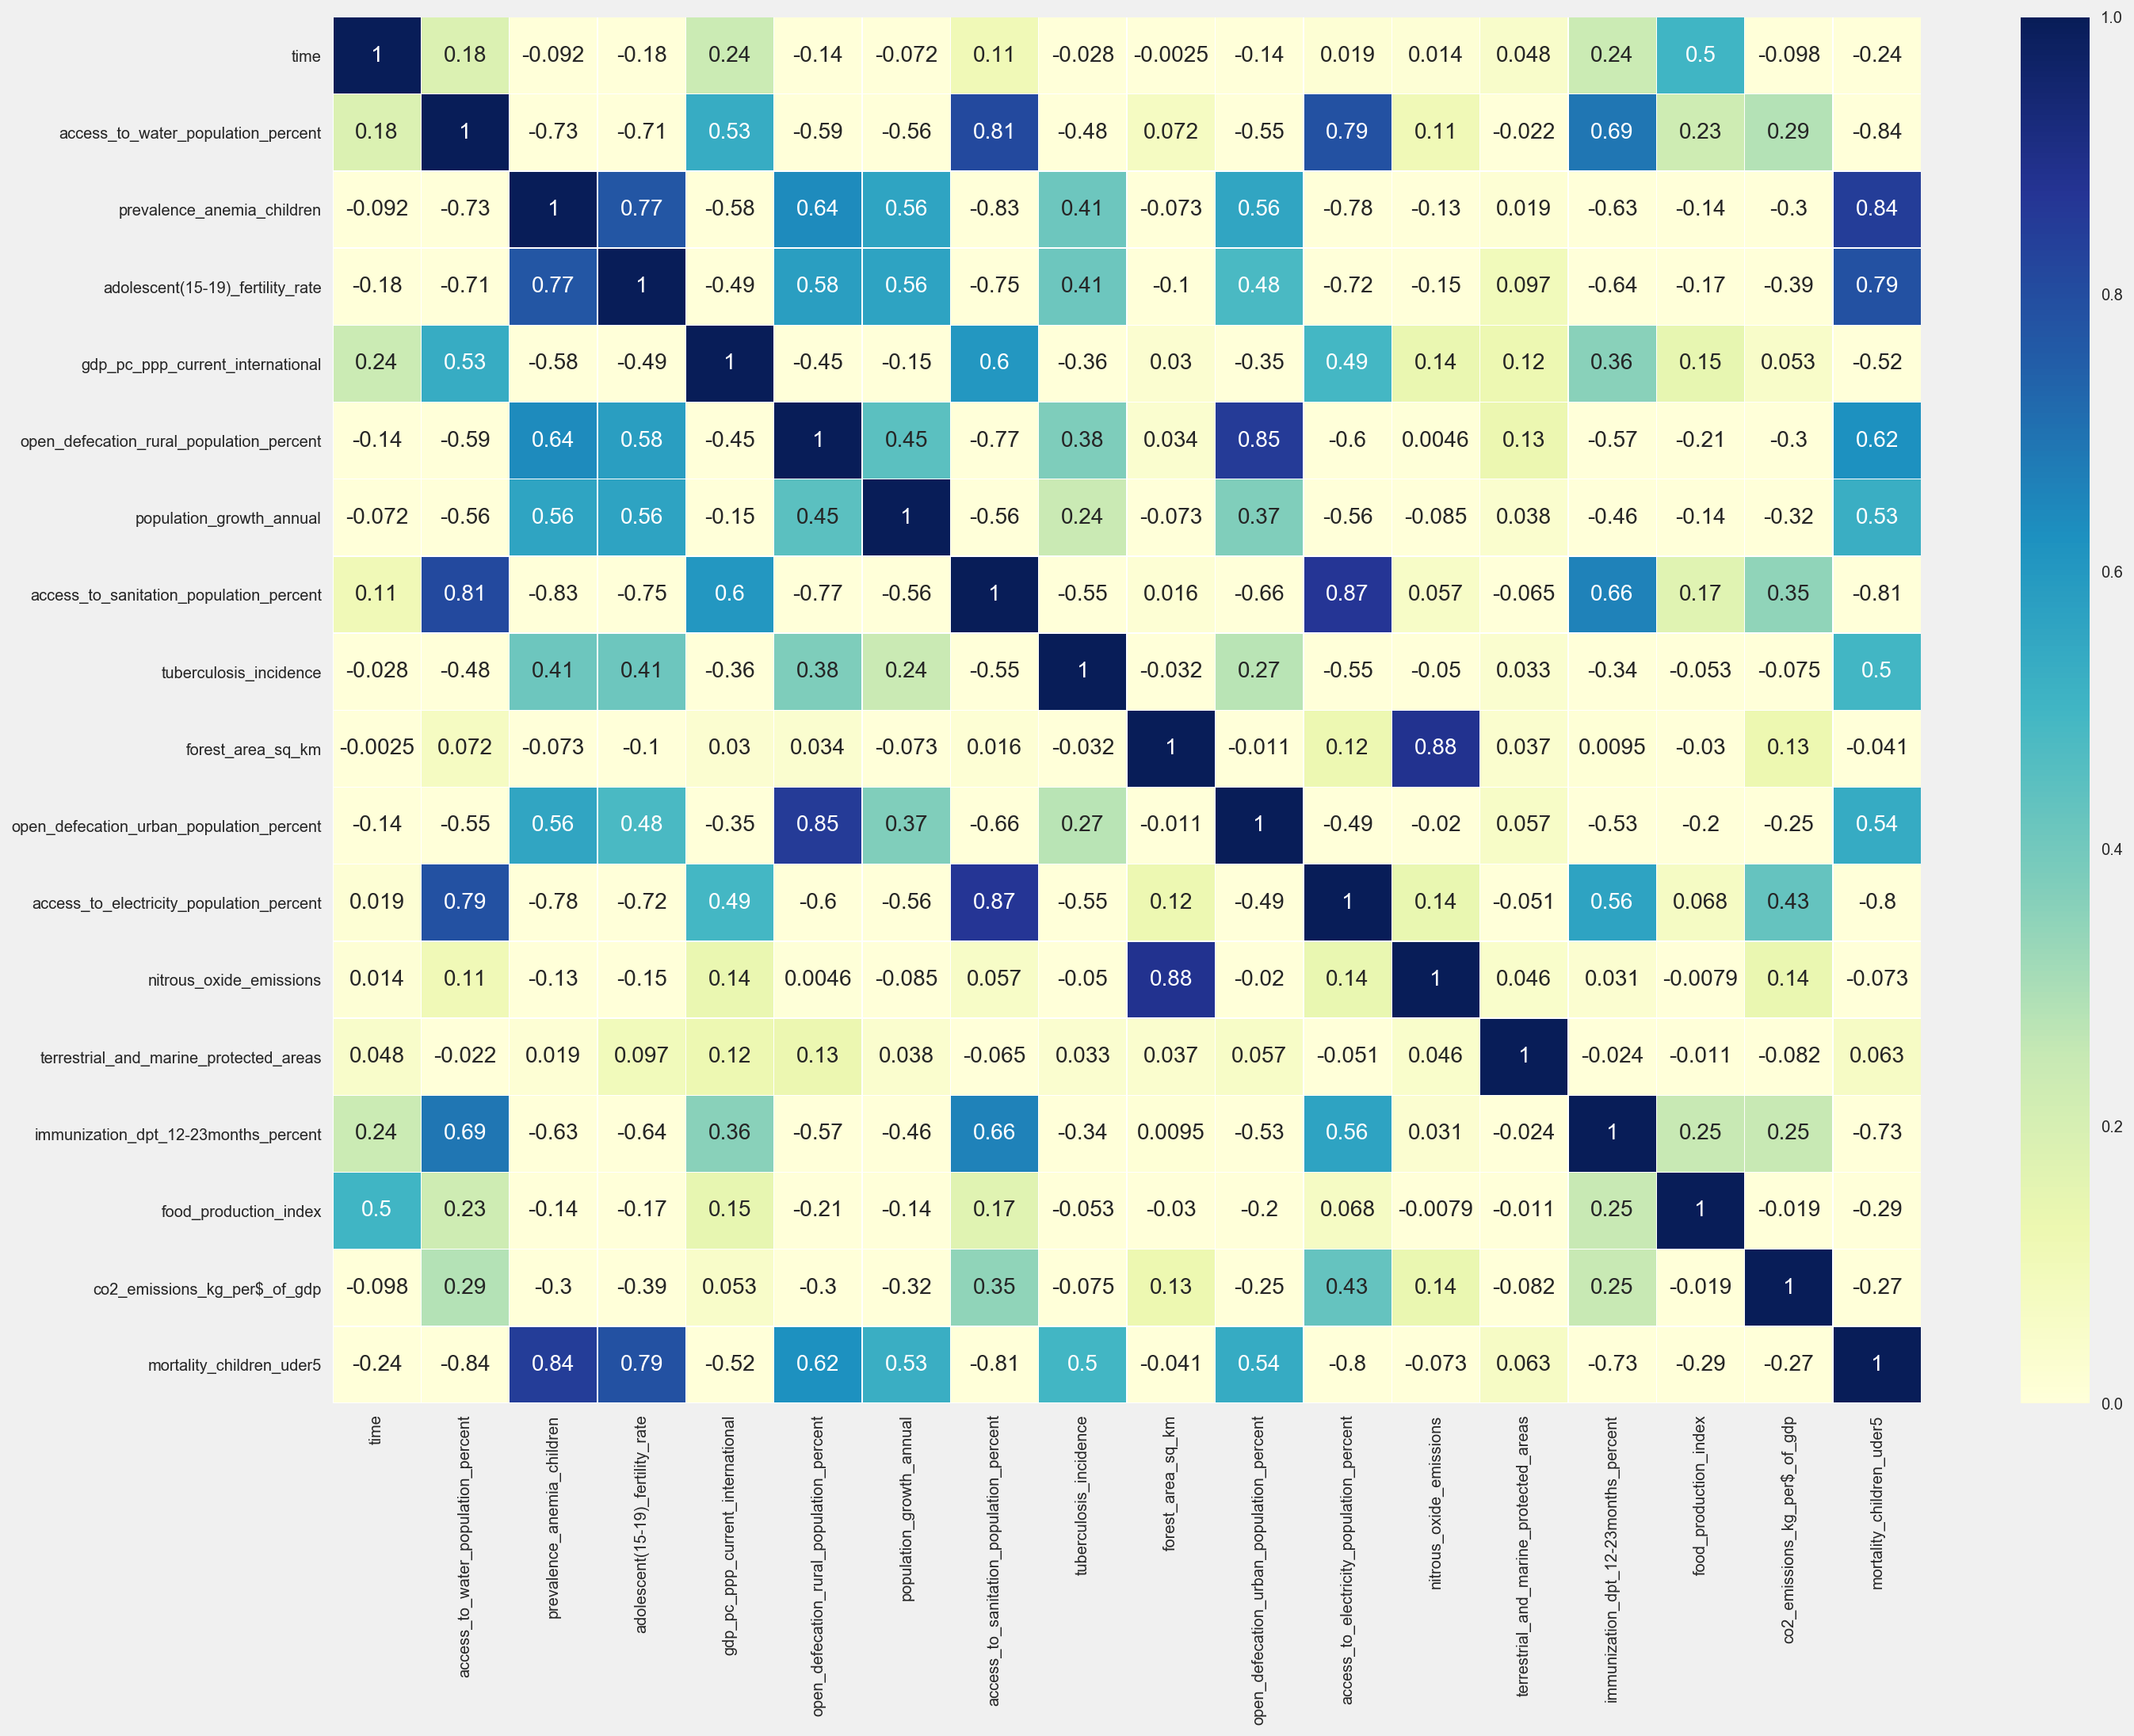

In [39]:
fig = plt.figure(figsize=(20,15))
ax = fig.gca()
sns.heatmap(dff.corr(), annot=True, linewidths=.15, cmap="YlGnBu", vmin=0, vmax=1, ax=ax)
plt.show()

### Now I will re-define my X and y and train and test sample to include only restricted data.

In [40]:
dff = dff.set_index(['country'])

dff.head()

time  access_to_water_population_percent  \
country                                                 
Afghanistan  1990                           36.228001   
Afghanistan  1991                           21.200001   
Afghanistan  1992                           21.299999   
Afghanistan  1993                           21.400000   
Afghanistan  1994                           21.400000   

             prevalence_anemia_children  adolescent(15-19)_fertility_rate  \
country                                                                     
Afghanistan                   62.799999                        162.738007   
Afghanistan                   61.299999                        163.326996   
Afghanistan                   59.799999                        163.916000   
Afghanistan                   58.299999                        164.181198   
Afghanistan                   56.900002                        164.446396   

             gdp_pc_ppp_current_international  \
country                                         
Afghanistan                       1432.553345   
Afghanistan                       1432.553345   
Afghanistan                       1432.553345   
Afghanistan                       1432.553345   
Afghanistan                       1432.553345   

             open_defecation_rural_population_percent  \
country                                                 
Afghanistan                                 28.560003   
Afghanistan                                 38.099998   
Afghanistan                                 38.099998   
Afghanistan                                 38.099998   
Afghanistan                                 38.099998   

             population_growth_annual  \
country                                 
Afghanistan                  3.879694   
Afghanistan                  5.809298   
Afghanistan                  7.210629   
Afghanistan                  7.555156   
Afghanistan                  6.815594   

             access_to_sanitation_population_percent  tuberculosis_incidence  \
country                                                                        
Afghanistan                                25.395998                189.0625   
Afghanistan                                20.500000                189.0625   
Afghanistan                                20.500000                189.0625   
Afghanistan                                20.500000                189.0625   
Afghanistan                                20.600000                189.0625   

             forest_area_sq_km  open_defecation_urban_population_percent  \
country                                                                    
Afghanistan            13500.0                                      7.88   
Afghanistan            13500.0                                     16.00   
Afghanistan            13500.0                                     16.00   
Afghanistan            13500.0                                     16.00   
Afghanistan            13500.0                                     16.00   

             access_to_electricity_population_percent  \
country                                                 
Afghanistan                                 34.615669   
Afghanistan                                 39.017876   
Afghanistan                                 39.017876   
Afghanistan                                 39.017876   
Afghanistan                                 39.017876   

             nitrous_oxide_emissions  terrestrial_and_marine_protected_areas  \
country                                                                        
Afghanistan               106.891068                                0.360000   
Afghanistan               105.598541                                0.393333   
Afghanistan               103.721191                                0.393333   
Afghanistan               111.693932                                0.393333   
Afghanistan               120.996895                               

In [41]:
# Defining x and y

y = dff['mortality_children_uder5']

X = dff.drop(['mortality_children_uder5'], axis=1)

print X.shape, y.shape

(3861, 17) (3861L,)


In [42]:
# Standardizing

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

Xn = ss.fit_transform(X)

In [43]:
# Splitting the data


from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xn, y, test_size=0.3, random_state=10)
print X_train.shape, X_test.shape
print "\n======\n"
print y_train.shape, y_test.shape

(2702L, 17L) (1159L, 17L)


(2702L,) (1159L,)


### Regression tree

In [44]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()

params = {"max_depth": [3,5,10,20],
          "max_features": [None, "auto"],
          "min_samples_leaf": [1, 3, 5, 7, 20],
          "min_samples_split": [2, 5, 7],
           "criterion" : ['mse']
         }

from sklearn.grid_search import GridSearchCV
dtr_gs = GridSearchCV(dtr, params, n_jobs=-1, cv=10, verbose=1)

dtr_gs.fit(X_train, y_train)


C:\Users\Boris\Anaconda2\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Fitting 10 folds for each of 120 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Done  75 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed:   13.5s finished


GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_features': [None, 'auto'], 'min_samples_split': [2, 5, 7], 'criterion': ['mse'], 'max_depth': [3, 5, 10, 20], 'min_samples_leaf': [1, 3, 5, 7, 20]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [45]:
dtr_best = dtr_gs.best_estimator_ 

print "best estimator", dtr_best
print "\n==========\n"
print "best parameters",  dtr_gs.best_params_
print "\n==========\n"
print "best score", dtr_gs.best_score_

best estimator DecisionTreeRegressor(criterion='mse', max_depth=20, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')


best parameters {'max_features': None, 'min_samples_split': 2, 'criterion': 'mse', 'max_depth': 20, 'min_samples_leaf': 1}


best score 0.960032130744


In [46]:
def feature_importance(X, best_model):
    feature_importance = pd.DataFrame({'feature':X.columns, 'importance':best_model.feature_importances_})
    feature_importance.sort_values('importance', ascending=False, inplace=True)
    return feature_importance

feature_importance(X, dtr_best)

feature  importance
1         access_to_water_population_percent    0.623653
3           adolescent(15-19)_fertility_rate    0.135660
2                 prevalence_anemia_children    0.109803
4           gdp_pc_ppp_current_international    0.024033
7    access_to_sanitation_population_percent    0.017090
9                          forest_area_sq_km    0.015084
8                     tuberculosis_incidence    0.014190
14      immunization_dpt_12-23months_percent    0.011853
12                   nitrous_oxide_emissions    0.009078
15                     food_production_index    0.008421
13    terrestrial_and_marine_protected_areas    0.008023
0                                       time    0.006614
11  access_to_electricity_population_percent    0.005072
6                   population_growth_annual    0.003486
5   open_defecation_rural_population_percent    0.003035
16              co2_emissions_kg_per$_of_gdp    0.002609
10  open_defecation_urban_population_percent    0.002295

In [47]:
rsquare_meansquare_error(y_train, y_test, X_train, X_test, "Regression tree", dtr_best)

MSE Regression tree train data: 0.03, test data: 120.26
R^2 Regression tree train data: 1.00, test data: 0.96


### Random forest

In [48]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor( )

params = {'max_depth':[3,4,5],  
          'max_leaf_nodes':[5,6,7], 
          'min_samples_split':[3,4],
          'n_estimators': [100]
         }

estimator_rfr = GridSearchCV(forest, params, n_jobs=-1,  cv=10,verbose=1)

In [49]:
estimator_rfr.fit(X_train, y_train)

Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   19.5s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  1.3min finished


GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'min_samples_split': [3, 4], 'max_leaf_nodes': [5, 6, 7], 'n_estimators': [100], 'max_depth': [3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [50]:
rfr_best = estimator_rfr.best_estimator_
feature_importance(X, rfr_best)

feature  importance
1         access_to_water_population_percent    0.356483
2                 prevalence_anemia_children    0.248090
11  access_to_electricity_population_percent    0.149075
7    access_to_sanitation_population_percent    0.112650
3           adolescent(15-19)_fertility_rate    0.093931
4           gdp_pc_ppp_current_international    0.022734
15                     food_production_index    0.007787
12                   nitrous_oxide_emissions    0.005624
0                                       time    0.001823
8                     tuberculosis_incidence    0.001176
14      immunization_dpt_12-23months_percent    0.000625
10  open_defecation_urban_population_percent    0.000000
9                          forest_area_sq_km    0.000000
6                   population_growth_annual    0.000000
13    terrestrial_and_marine_protected_areas    0.000000
5   open_defecation_rural_population_percent    0.000000
16              co2_emissions_kg_per$_of_gdp    0.000000

In [51]:
rsquare_meansquare_error(y_train, y_test, X_train, X_test, "Random Forest Regression tree", rfr_best)

MSE Random Forest Regression tree train data: 319.96, test data: 418.39
R^2 Random Forest Regression tree train data: 0.89, test data: 0.86


In [52]:
dff = dff.reset_index()
dff.head()

country  time  access_to_water_population_percent  \
0  Afghanistan  1990                           36.228001   
1  Afghanistan  1991                           21.200001   
2  Afghanistan  1992                           21.299999   
3  Afghanistan  1993                           21.400000   
4  Afghanistan  1994                           21.400000   

   prevalence_anemia_children  adolescent(15-19)_fertility_rate  \
0                   62.799999                        162.738007   
1                   61.299999                        163.326996   
2                   59.799999                        163.916000   
3                   58.299999                        164.181198   
4                   56.900002                        164.446396   

   gdp_pc_ppp_current_international  open_defecation_rural_population_percent  \
0                       1432.553345                                 28.560003   
1                       1432.553345                                 38.099998   
2                       1432.553345                                 38.099998   
3                       1432.553345                                 38.099998   
4                       1432.553345                                 38.099998   

   population_growth_annual  access_to_sanitation_population_percent  \
0                  3.879694                                25.395998   
1                  5.809298                                20.500000   
2                  7.210629                                20.500000   
3                  7.555156                                20.500000   
4                  6.815594                                20.600000   

   tuberculosis_incidence  forest_area_sq_km  \
0                189.0625            13500.0   
1                189.0625            13500.0   
2                189.0625            13500.0   
3                189.0625            13500.0   
4                189.0625            13500.0   

   open_defecation_urban_population_percent  \
0                                      7.88   
1                                     16.00   
2                                     16.00   
3                                     16.00   
4                                     16.00   

   access_to_electricity_population_percent  nitrous_oxide_emissions  \
0                                 34.615669               106.891068   
1                                 39.017876               105.598541   
2                                 39.017876               103.721191   
3                                 39.017876               111.693932   
4                                 39.017876               120.996895   

   terrestrial_and_marine_protected_areas  \
0                                0.360000   
1                                0.393333   
2                                0.393333   
3                                0.393333   
4                                0.393333   

   immunization_dpt_12-23months_percent  food_production_index  \
0                                  25.0              69.169998   
1                                  23.0              70.440002   
2                                  21.0              68.230003   
3                                  18.0              73.279999   
4                                  12.0              78.940002   

   co2_emissions_kg_per$_of_gdp  mortality_children_uder5  
0                      0.143554                181.000000  
1                      0.143554                174.199997  
2                      0.143554                167.800003  
3                      0.143554                162.000000  
4                      0.143554                156.800003

In [53]:
def histogram_plotter(title, data):
    sns.set(rc={"figure.figsize": (10, 7)})
    sns.set_style('white')
    dist = sns.distplot(data, hist_kws={'alpha':0.2}, kde_kws={'linewidth':2})
    
    dist.axvline(np.mean(data), lw=1, c='red', ls='dashed')
    average_roll = '{0:.2f}'.format(np.mean(data))
    title = 'Distribution of ' + title + '; average = '  + average_roll + '\n'
    dist.set_title(title, fontsize=16)
    dist = sns.distplot(data, hist_kws={'alpha':0.2}, kde_kws={'linewidth':1})


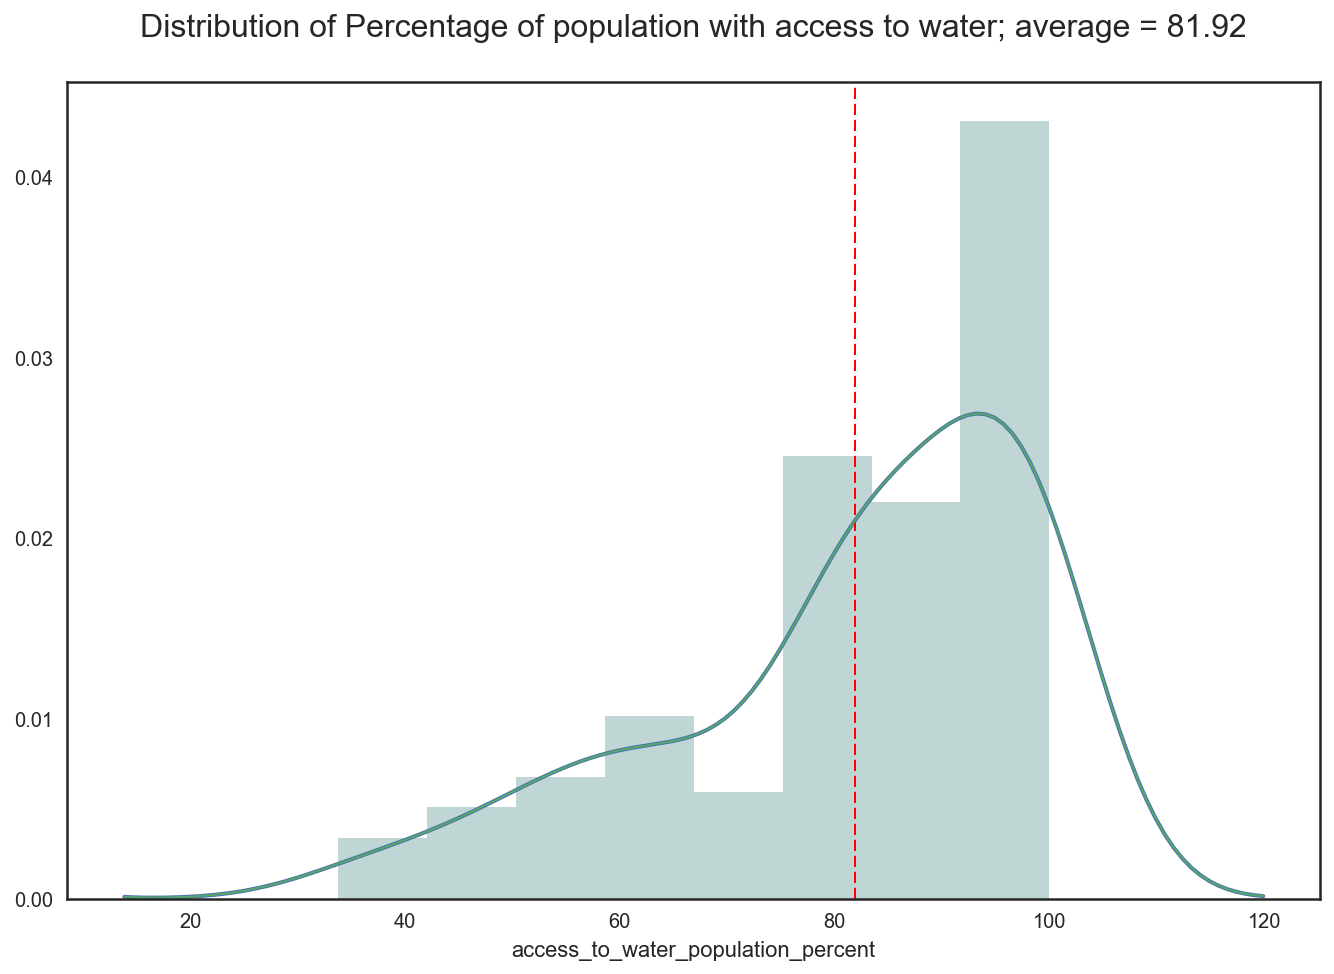

In [54]:
histogram_plotter("Percentage of population with access to water", dff.groupby('country')['access_to_water_population_percent'].mean())

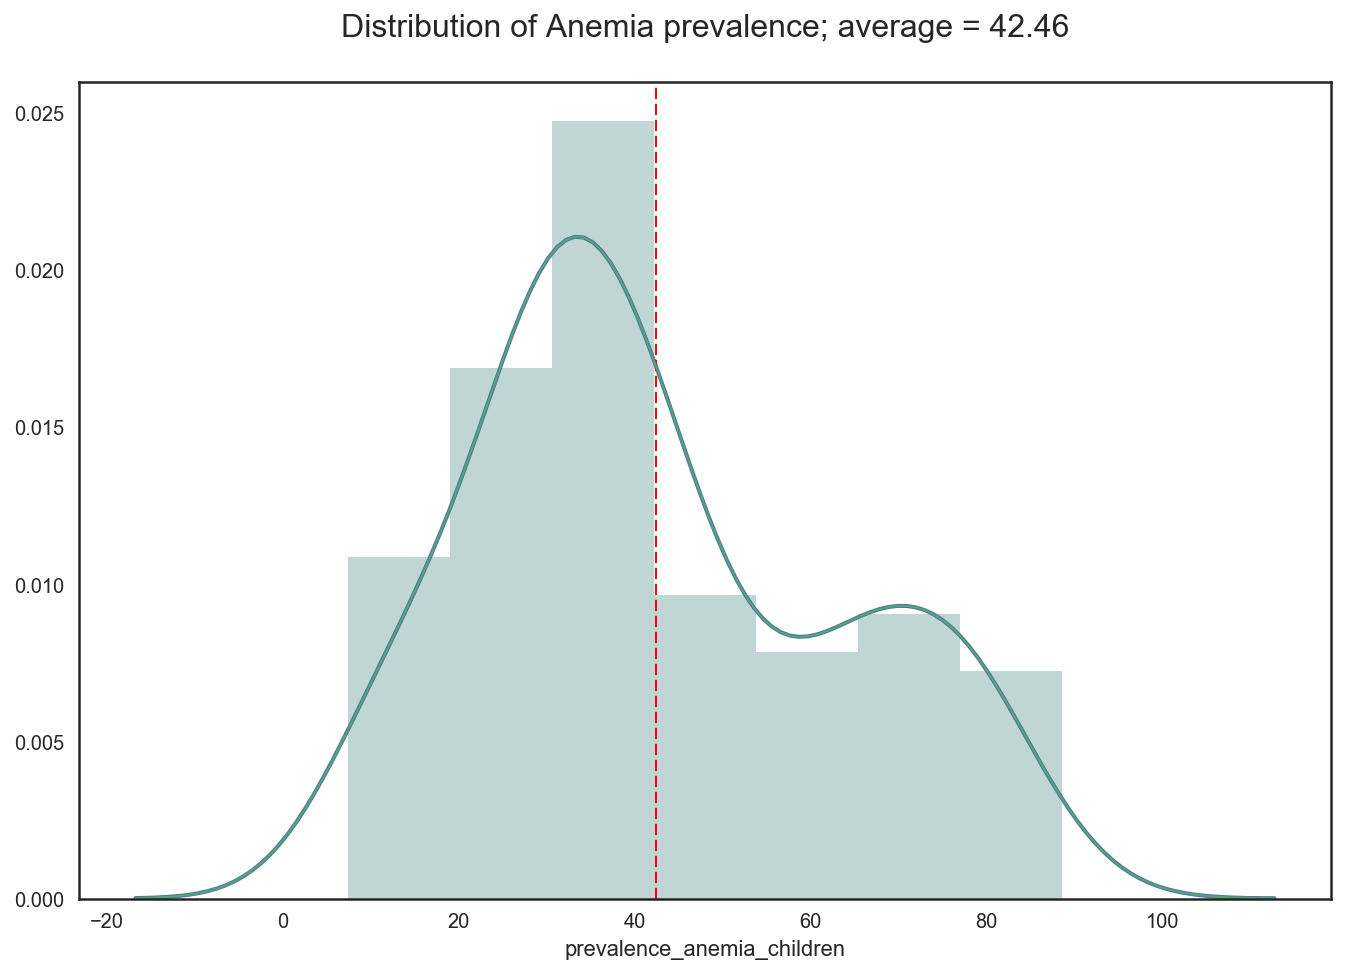

In [55]:
histogram_plotter("Anemia prevalence", dff.groupby('country')['prevalence_anemia_children'].mean())

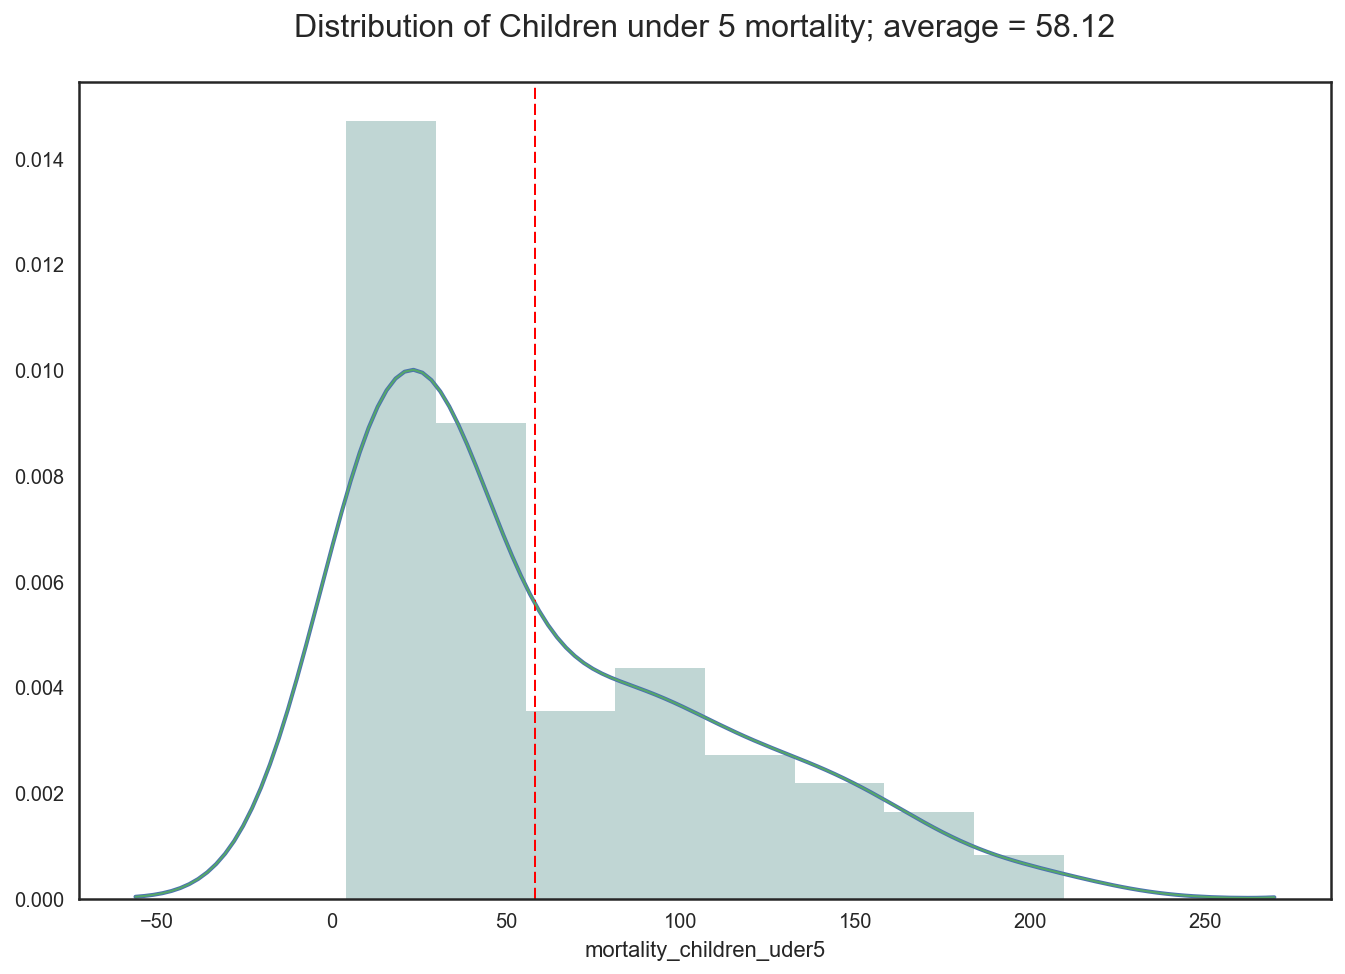

In [56]:
histogram_plotter("Children under 5 mortality", dff.groupby('country')['mortality_children_uder5'].mean())

In [57]:
def category(x):
    if x <100:
        return 0
    else:
        return 1
    
dff['category'] = dff.mortality_children_uder5.map(category)

In [58]:
dff_dummies = pd.get_dummies(dff)


In [59]:
y = dff_dummies.category.values

X = dff_dummies.drop(['category'], axis=1)

print y.shape, X.shape

(3861L,) (3861, 161)


In [60]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xn, y, test_size=0.3, random_state=10)
print X_train.shape, X_test.shape
print "\n======\n"
print y_train.shape, y_test.shape

(2702L, 17L) (1159L, 17L)


(2702L,) (1159L,)


In [61]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()

Cs = np.logspace(0.0, 5.0, 20)

search_parameters = {  "penalty": ['l1','l2'], "C": Cs, "fit_intercept": [False, True], 
                       "class_weight": [None, "balanced"], "intercept_scaling": [2, 1], "solver":  ['liblinear']
                    }


from sklearn.grid_search import GridSearchCV

classif = GridSearchCV(logistic, search_parameters, cv=10, verbose=1, n_jobs=-1)

In [62]:
classif.fit(X_train,y_train)

Fitting 10 folds for each of 320 candidates, totalling 3200 fits


[Parallel(n_jobs=-1)]: Done 149 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 1949 tasks      | elapsed:   16.6s
[Parallel(n_jobs=-1)]: Done 3200 out of 3200 | elapsed:   26.8s finished


GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'C': array([  1.00000e+00,   1.83298e+00,   3.35982e+00,   6.15848e+00,
         1.12884e+01,   2.06914e+01,   3.79269e+01,   6.95193e+01,
         1.27427e+02,   2.33572e+02,   4.28133e+02,   7.84760e+02,
         1.43845e+03,   2.63665e+03,   4.83293e+03,   8.85867e+03,
         1.62378e+04,   2.97635e+04,   5.45559e+04,   1.00000e+05]), 'intercept_scaling': [2, 1], 'solver': ['liblinear'], 'fit_intercept': [False, True], 'penalty': ['l1', 'l2'], 'class_weight': [None, 'balanced']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [63]:
log_best = classif.best_estimator_

In [64]:
from sklearn.metrics import confusion_matrix
y_pred=classif.predict(X_test)

confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
confusion = pd.DataFrame(confmat, index=['True under 100', 'True more than 100'],
                         columns=['Predicted under 100', 'Predicted more than 100'])

confusion

Predicted under 100  Predicted more than 100
True under 100                      887                       29
True more than 100                   43                      200

In [65]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print report

             precision    recall  f1-score   support

          0       0.95      0.97      0.96       916
          1       0.87      0.82      0.85       243

avg / total       0.94      0.94      0.94      1159



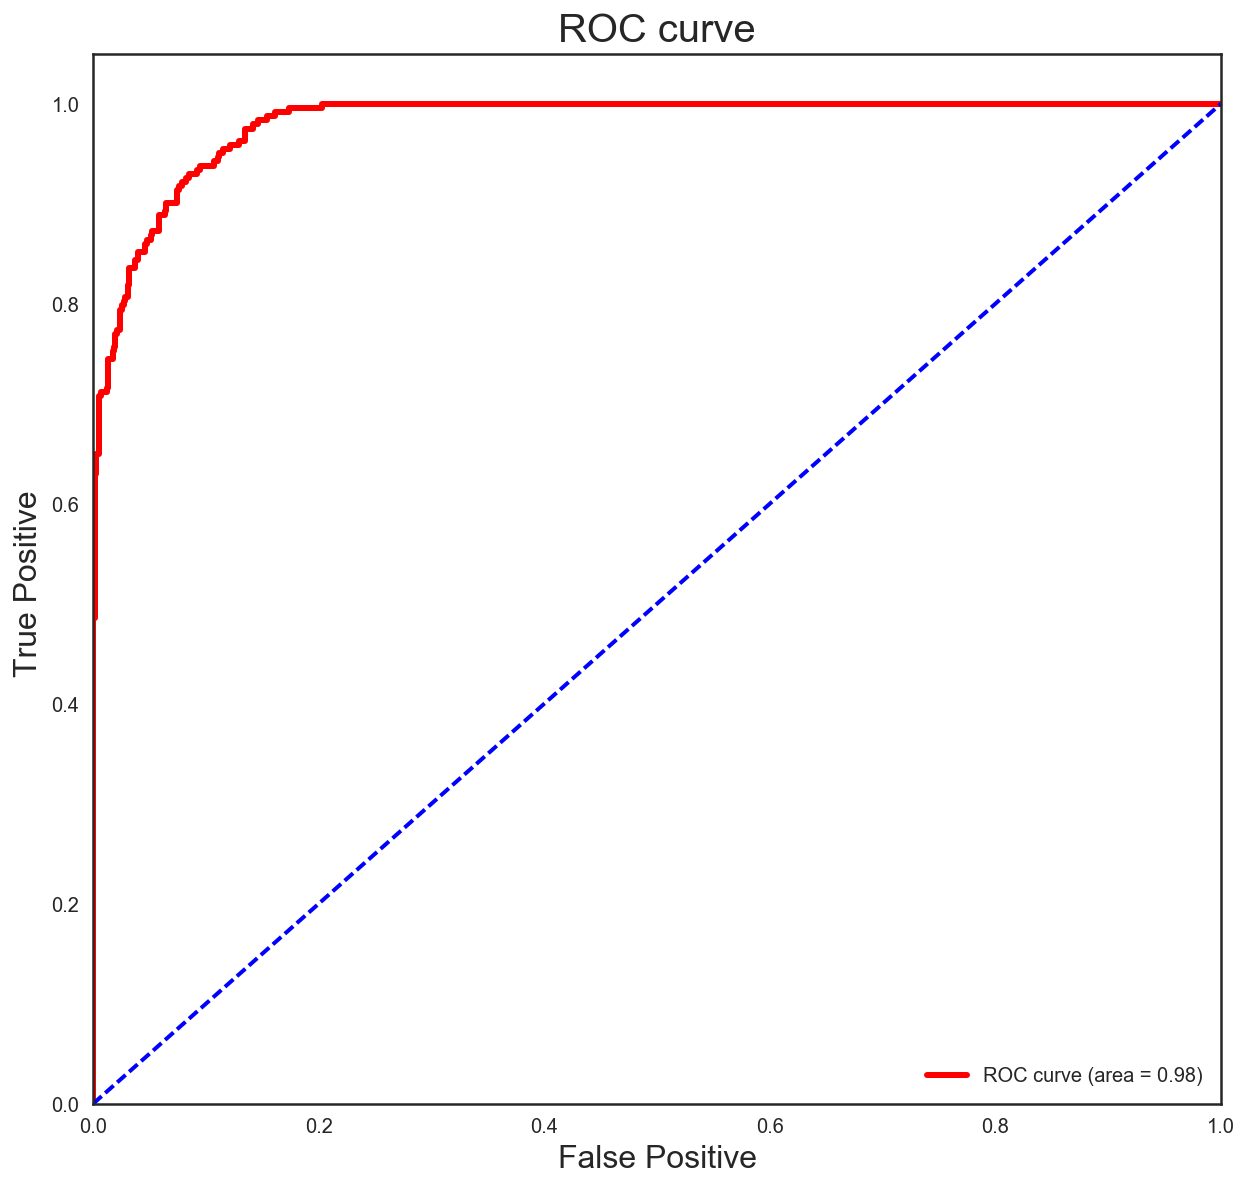

In [68]:
from sklearn.metrics import roc_curve, auc

# Get out the predicted probabilities for the X_test matrix
y_pp = classif.predict_proba(X_test)[:,1]

fpr, tpr, _ = roc_curve(y_test, y_pp)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=[9,9])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=3, color='red')
plt.plot([0, 1], [0, 1], linestyle='--', color='blue', linewidth=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive', fontsize=16)
plt.ylabel('True Positive ', fontsize=16)
plt.title('ROC curve', fontsize=20)
plt.legend(loc="lower right")
plt.show()

# Apendix: EDA and visualisation

In [ ]:
import plotly.plotly as py

data = [ dict(
        type = 'choropleth',
        locations = dff['country'],
        z = dff['mortality_children_uder5'],
        text = dff['country'],
        colorscale = [[0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
            [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            )
        ),
        tick0 = 0,
        zmin = 0,
        dtick = 1000,
        colorbar = dict(
            autotick = False,
            tickprefix = '$',
            title = 'Child mortality'
        ),
    ) ]

layout = dict(
    title = 'Child mortality',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
url = py.plot(fig, filename='d3-world-map')

##### This was supposed to be a choropleth map of world showing levels of child mortality in each country on world map

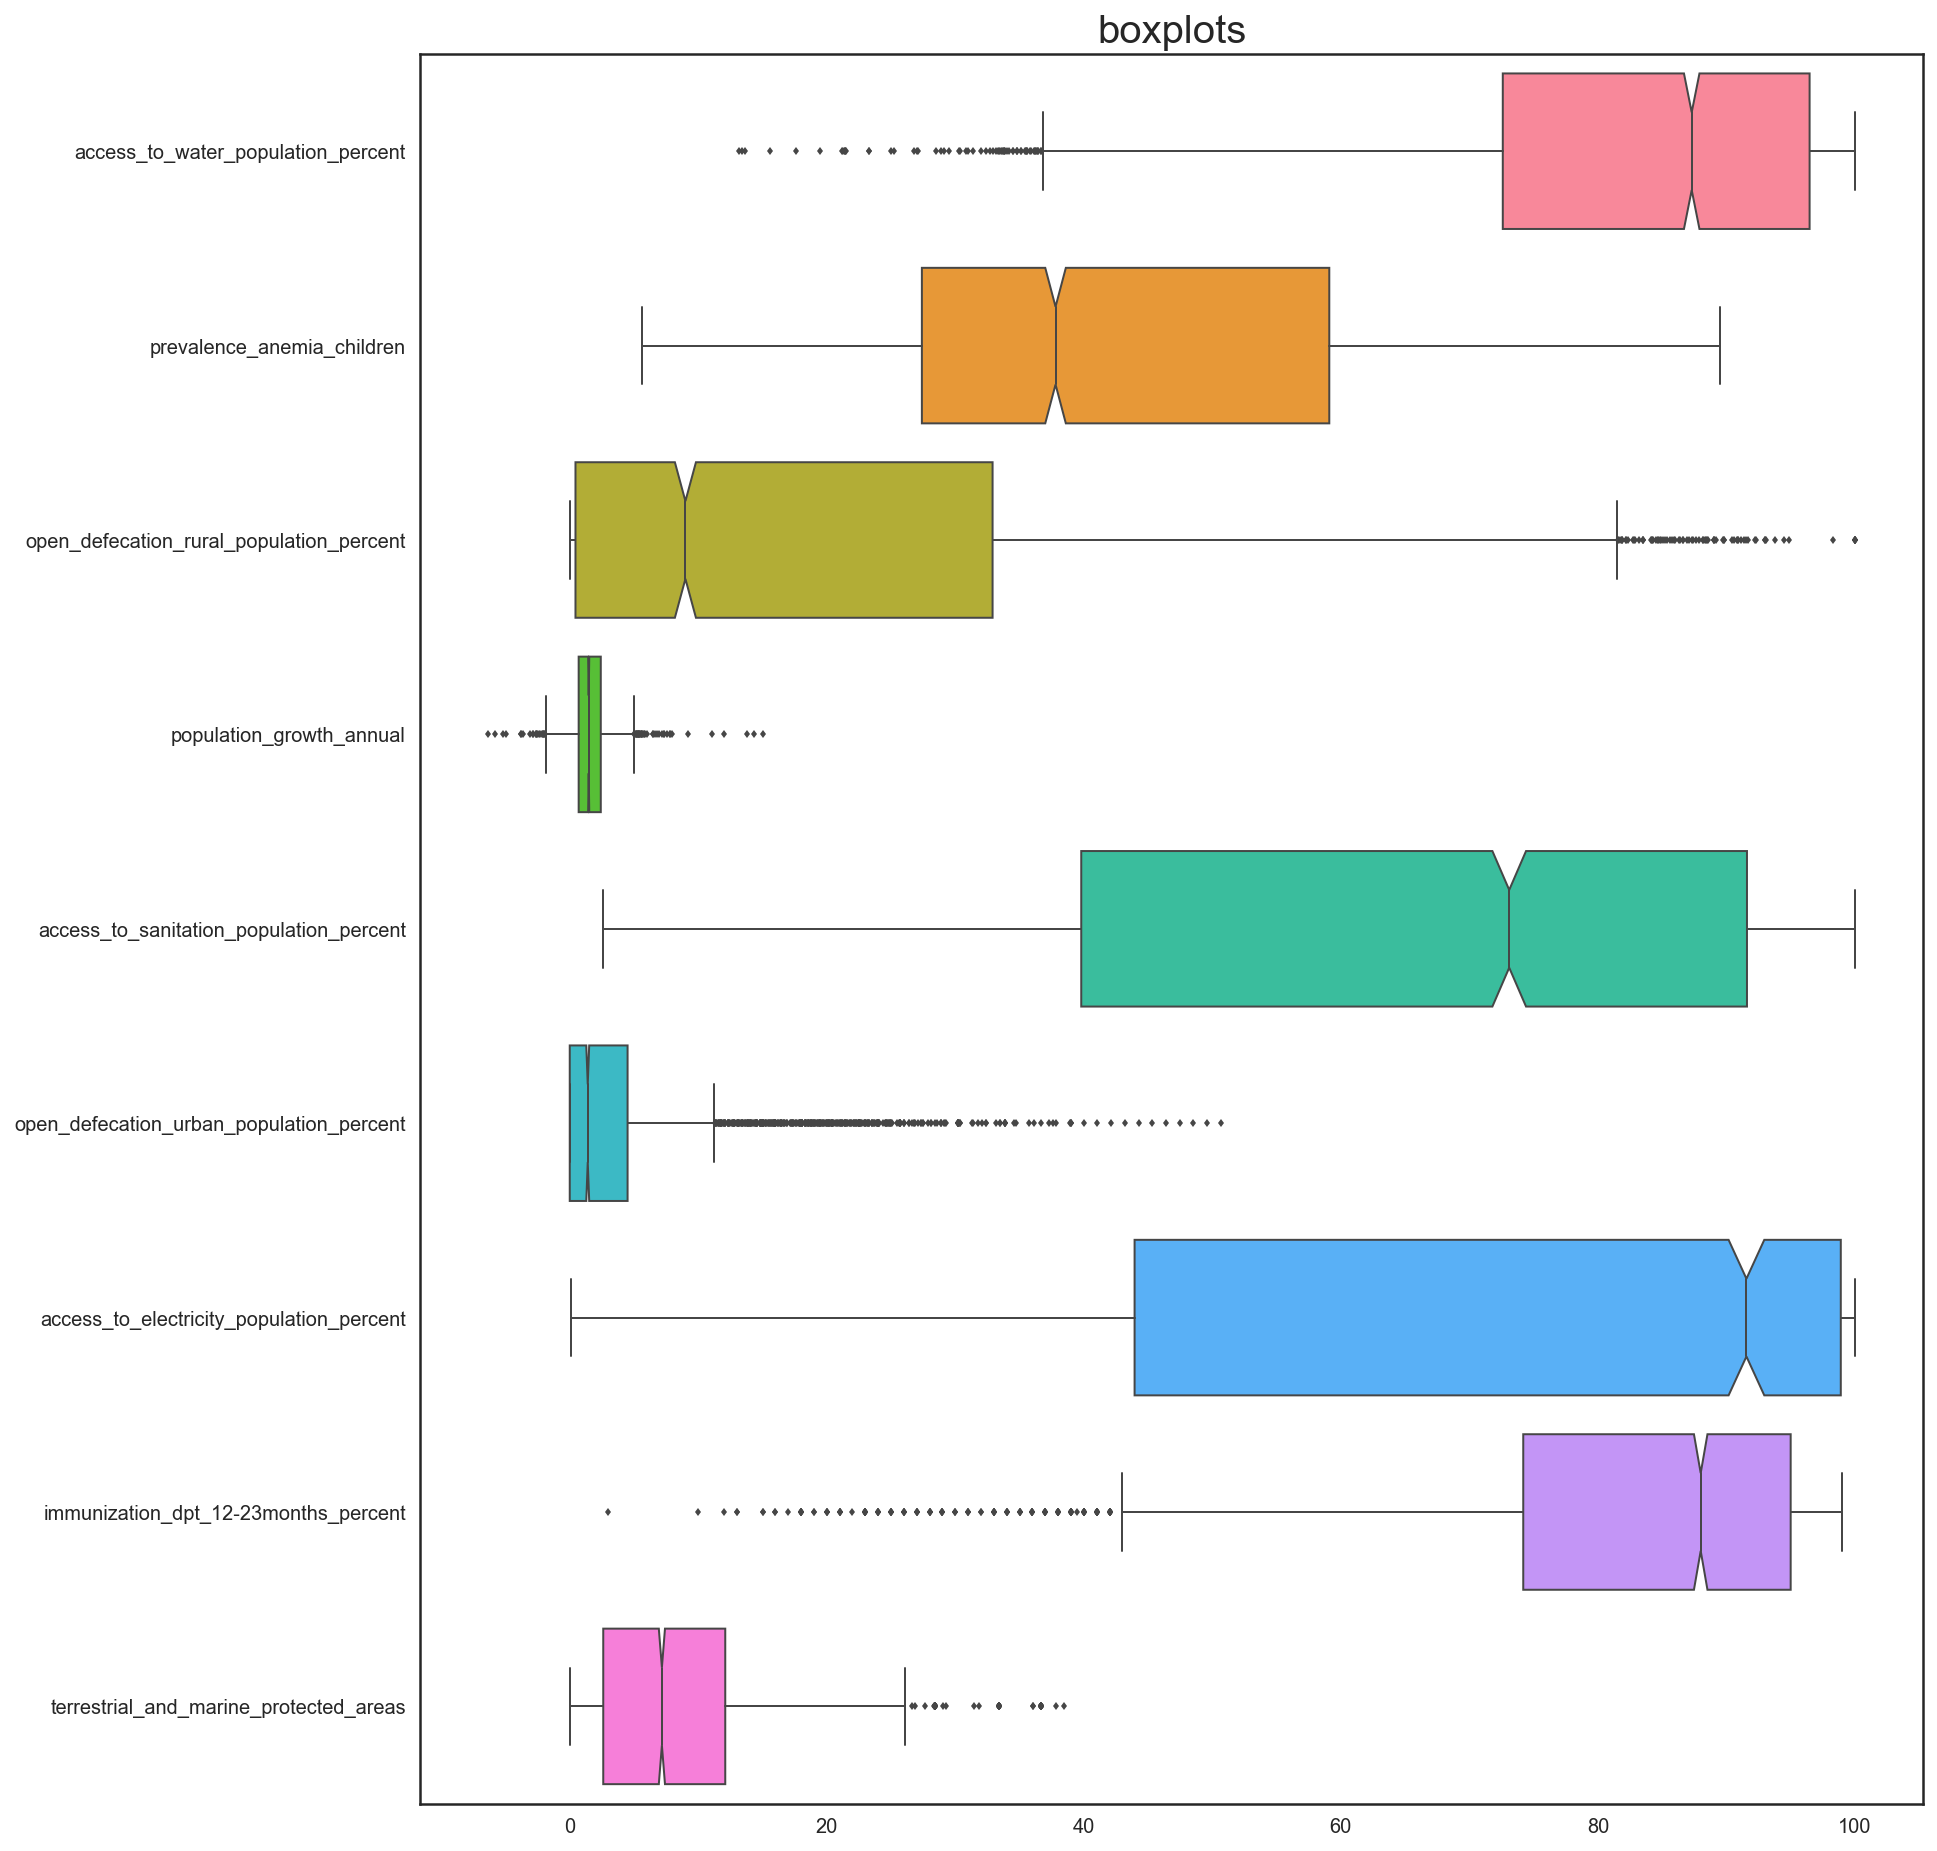

In [104]:
fig = plt.figure(figsize=(12,15))
ax = fig.gca()

sns.boxplot(data=dff[['access_to_water_population_percent','prevalence_anemia_children','open_defecation_rural_population_percent', 'population_growth_annual', 'access_to_sanitation_population_percent', 'open_defecation_urban_population_percent','access_to_electricity_population_percent', 'immunization_dpt_12-23months_percent', 'terrestrial_and_marine_protected_areas']], orient='h',
            fliersize=3, linewidth=1, notch=True, 
            saturation=10, ax=ax)

ax.set_title('boxplots', fontsize=20)

plt.show()

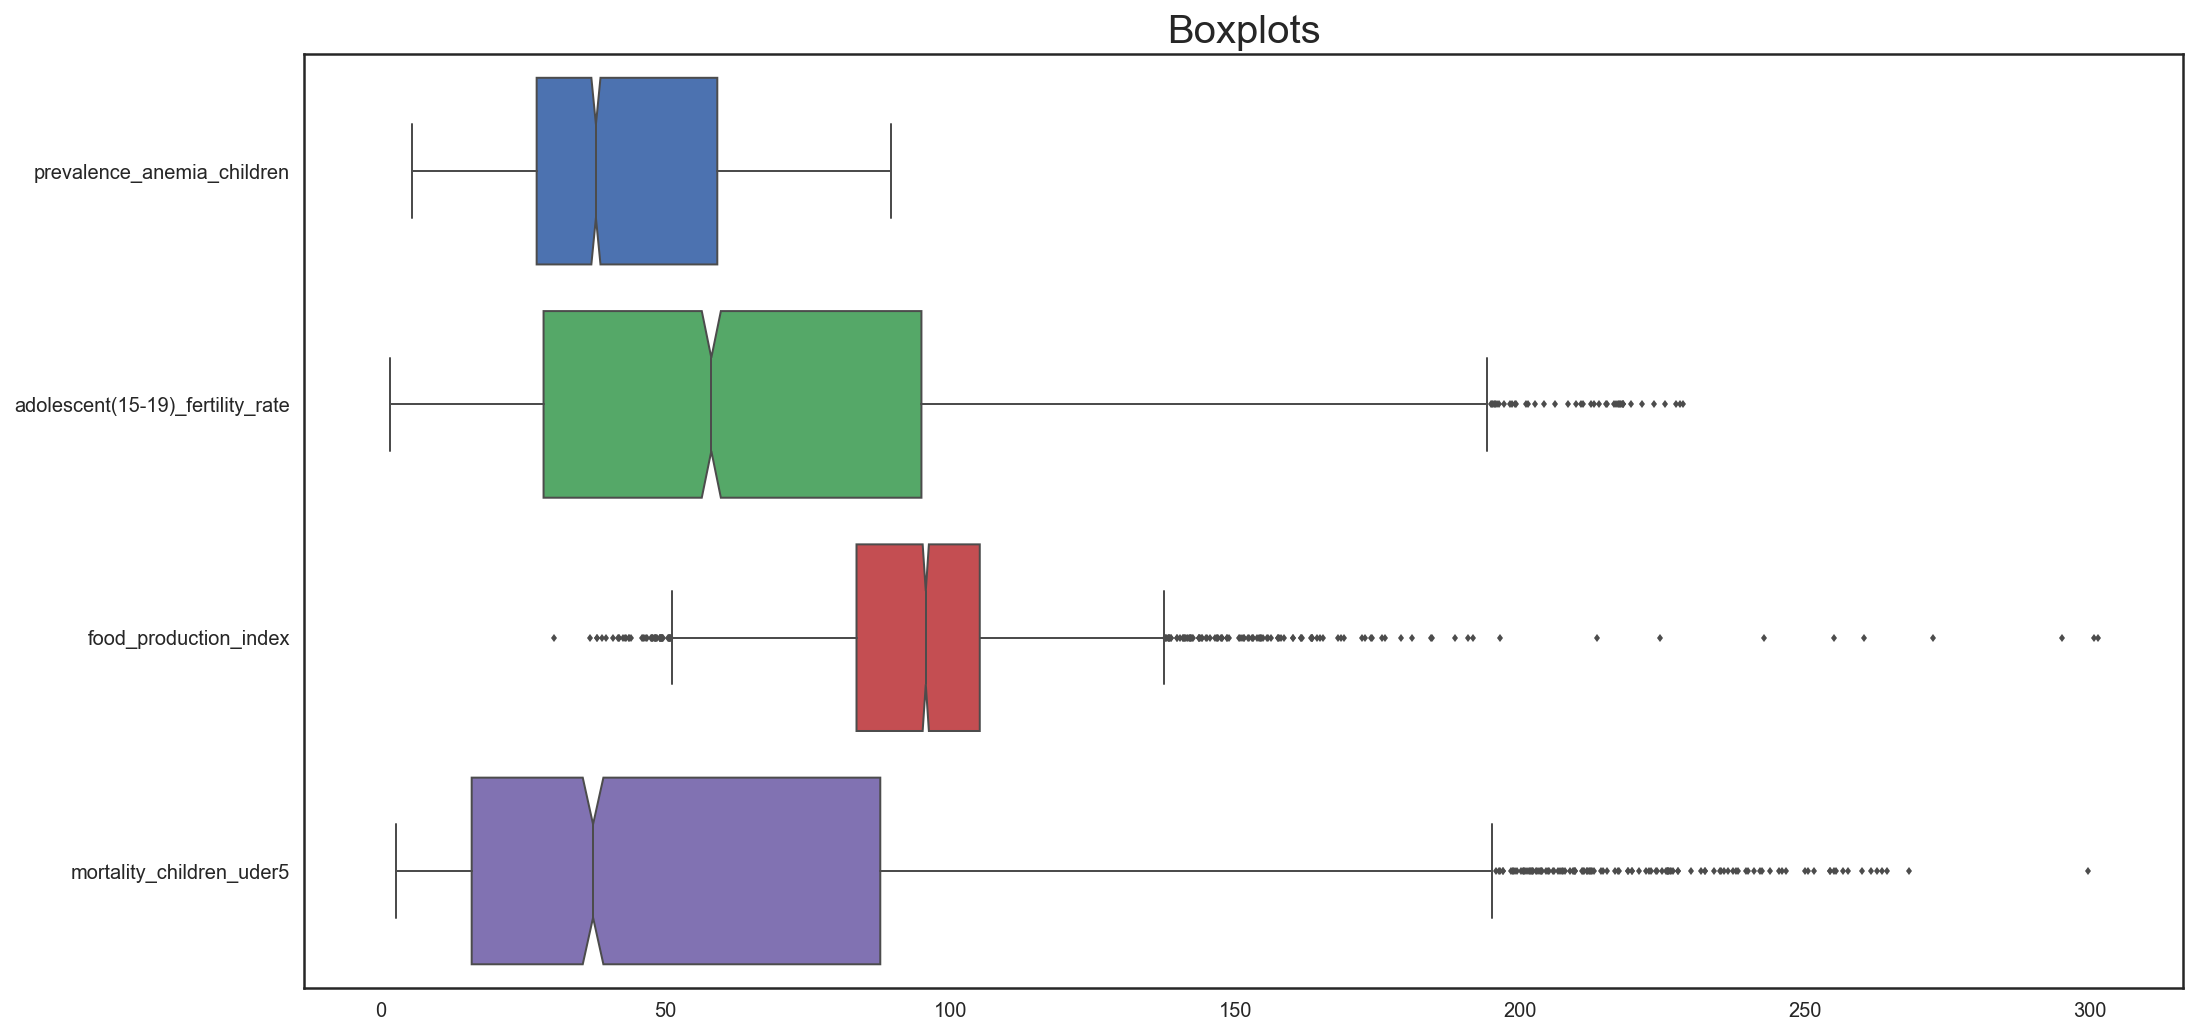

In [112]:
fig = plt.figure(figsize=(15,8))
ax = fig.gca()

sns.boxplot(data=dff[['adolescent(15-19)_fertility_rate', 
    'food_production_index',
    'mortality_children_uder5']], orient='h',
            fliersize=3, linewidth=1, notch=True, 
            saturation=10, ax=ax)

ax.set_title('Boxplots', fontsize=20)

plt.show()

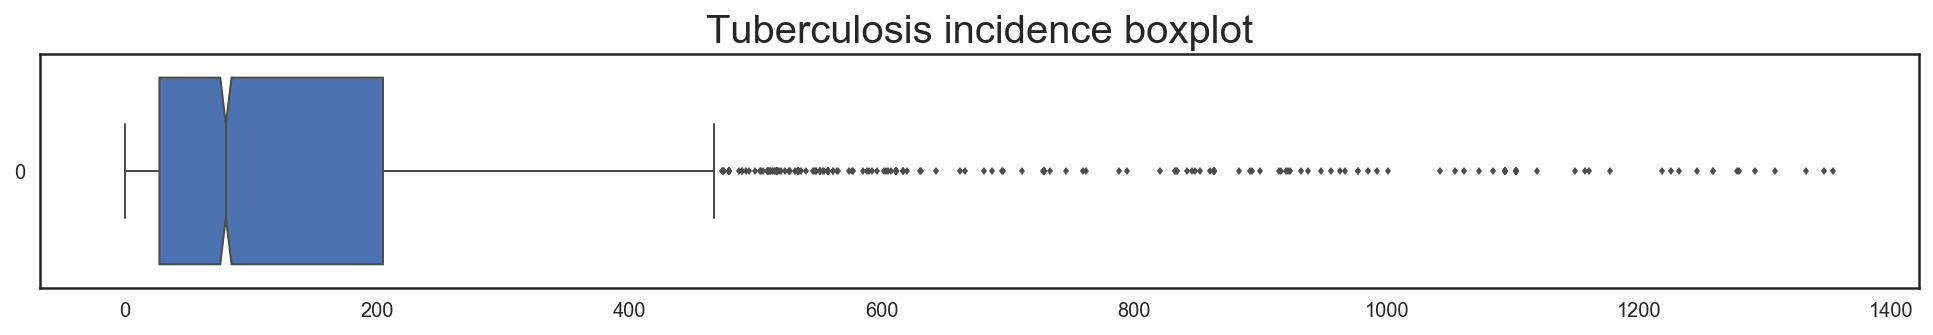

In [113]:
fig = plt.figure(figsize=(15,2))
ax = fig.gca()

sns.boxplot(data=dff['tuberculosis_incidence'], orient='h',
            fliersize=3, linewidth=1, notch=True, 
            saturation=10, ax=ax)

ax.set_title('Tuberculosis incidence boxplot', fontsize=20)

plt.show()

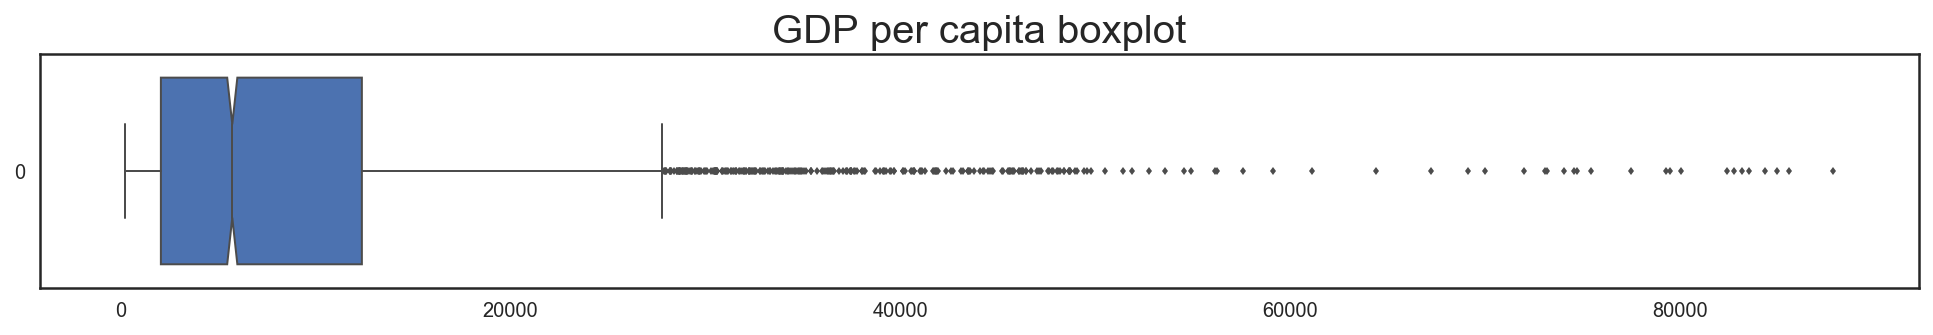

In [114]:
fig = plt.figure(figsize=(15,2))
ax = fig.gca()

sns.boxplot(data=dff['gdp_pc_ppp_current_international'], orient='h',
            fliersize=3, linewidth=1, notch=True, 
            saturation=10, ax=ax)

ax.set_title('GDP per capita boxplot', fontsize=20)

plt.show()

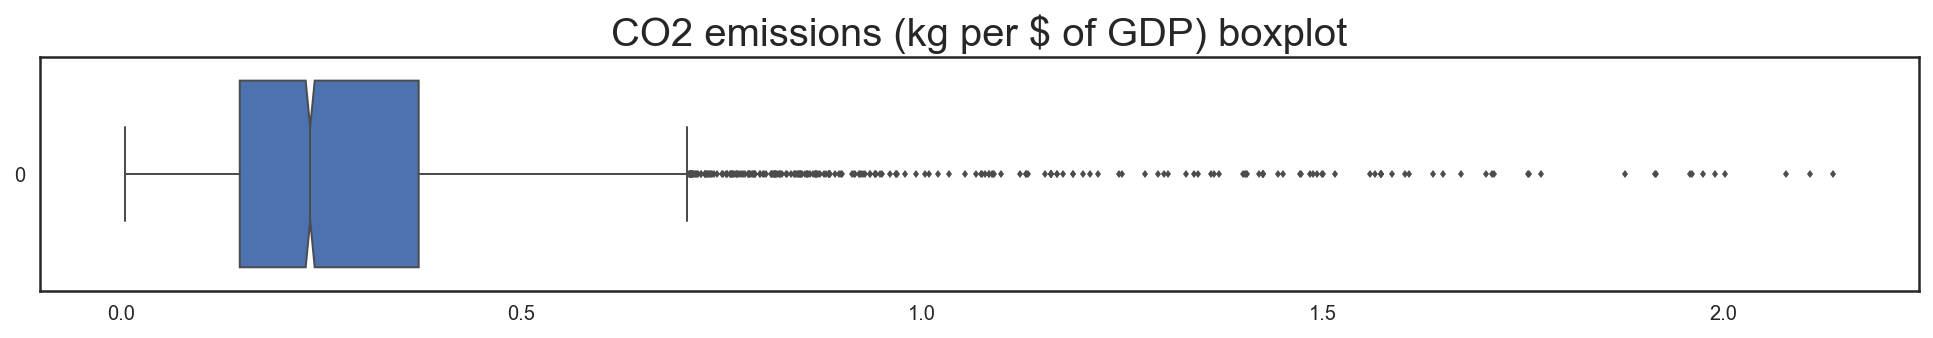

In [115]:
fig = plt.figure(figsize=(15,2))
ax = fig.gca()

sns.boxplot(data=dff['co2_emissions_kg_per$_of_gdp'], orient='h',
            fliersize=3, linewidth=1, notch=True, 
            saturation=10, ax=ax)

ax.set_title('CO2 emissions (kg per $ of GDP) boxplot', fontsize=20)

plt.show()

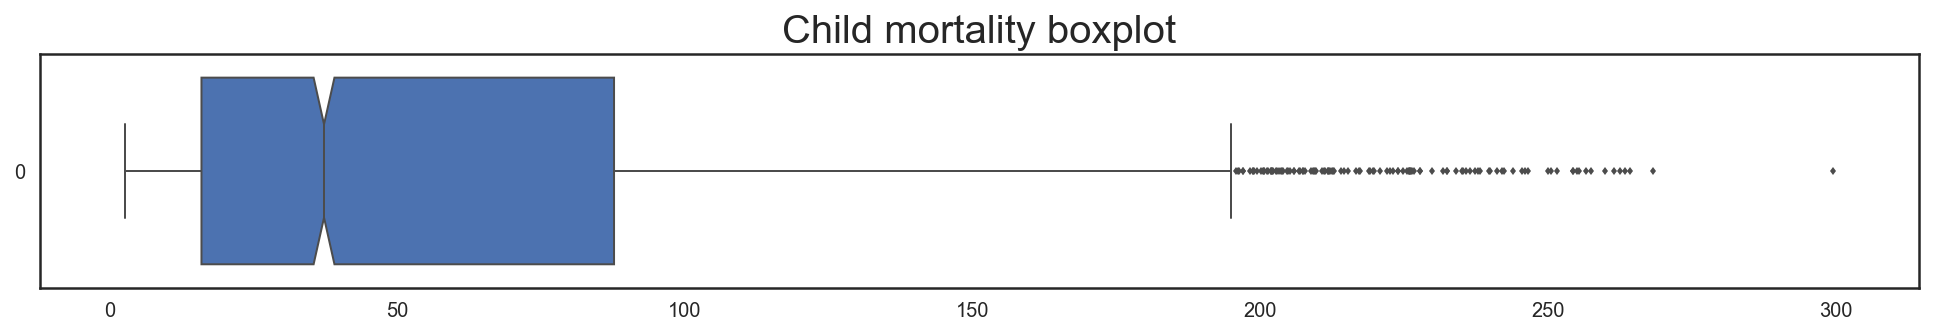

In [116]:
fig = plt.figure(figsize=(15,2))
ax = fig.gca()

sns.boxplot(data=dff['mortality_children_uder5'], orient='h',
            fliersize=3, linewidth=1, notch=True, 
            saturation=10, ax=ax)

ax.set_title('Child mortality boxplot', fontsize=20)

plt.show()

#### As we can see, a lot of variables have big outliers, but that is not a major concern because we are standardizing our variables before running the models. On the other side, I wouldn't exclude outliers because of nature of my data - outliers are actually the main driving force of different levels of my dependent variable. 

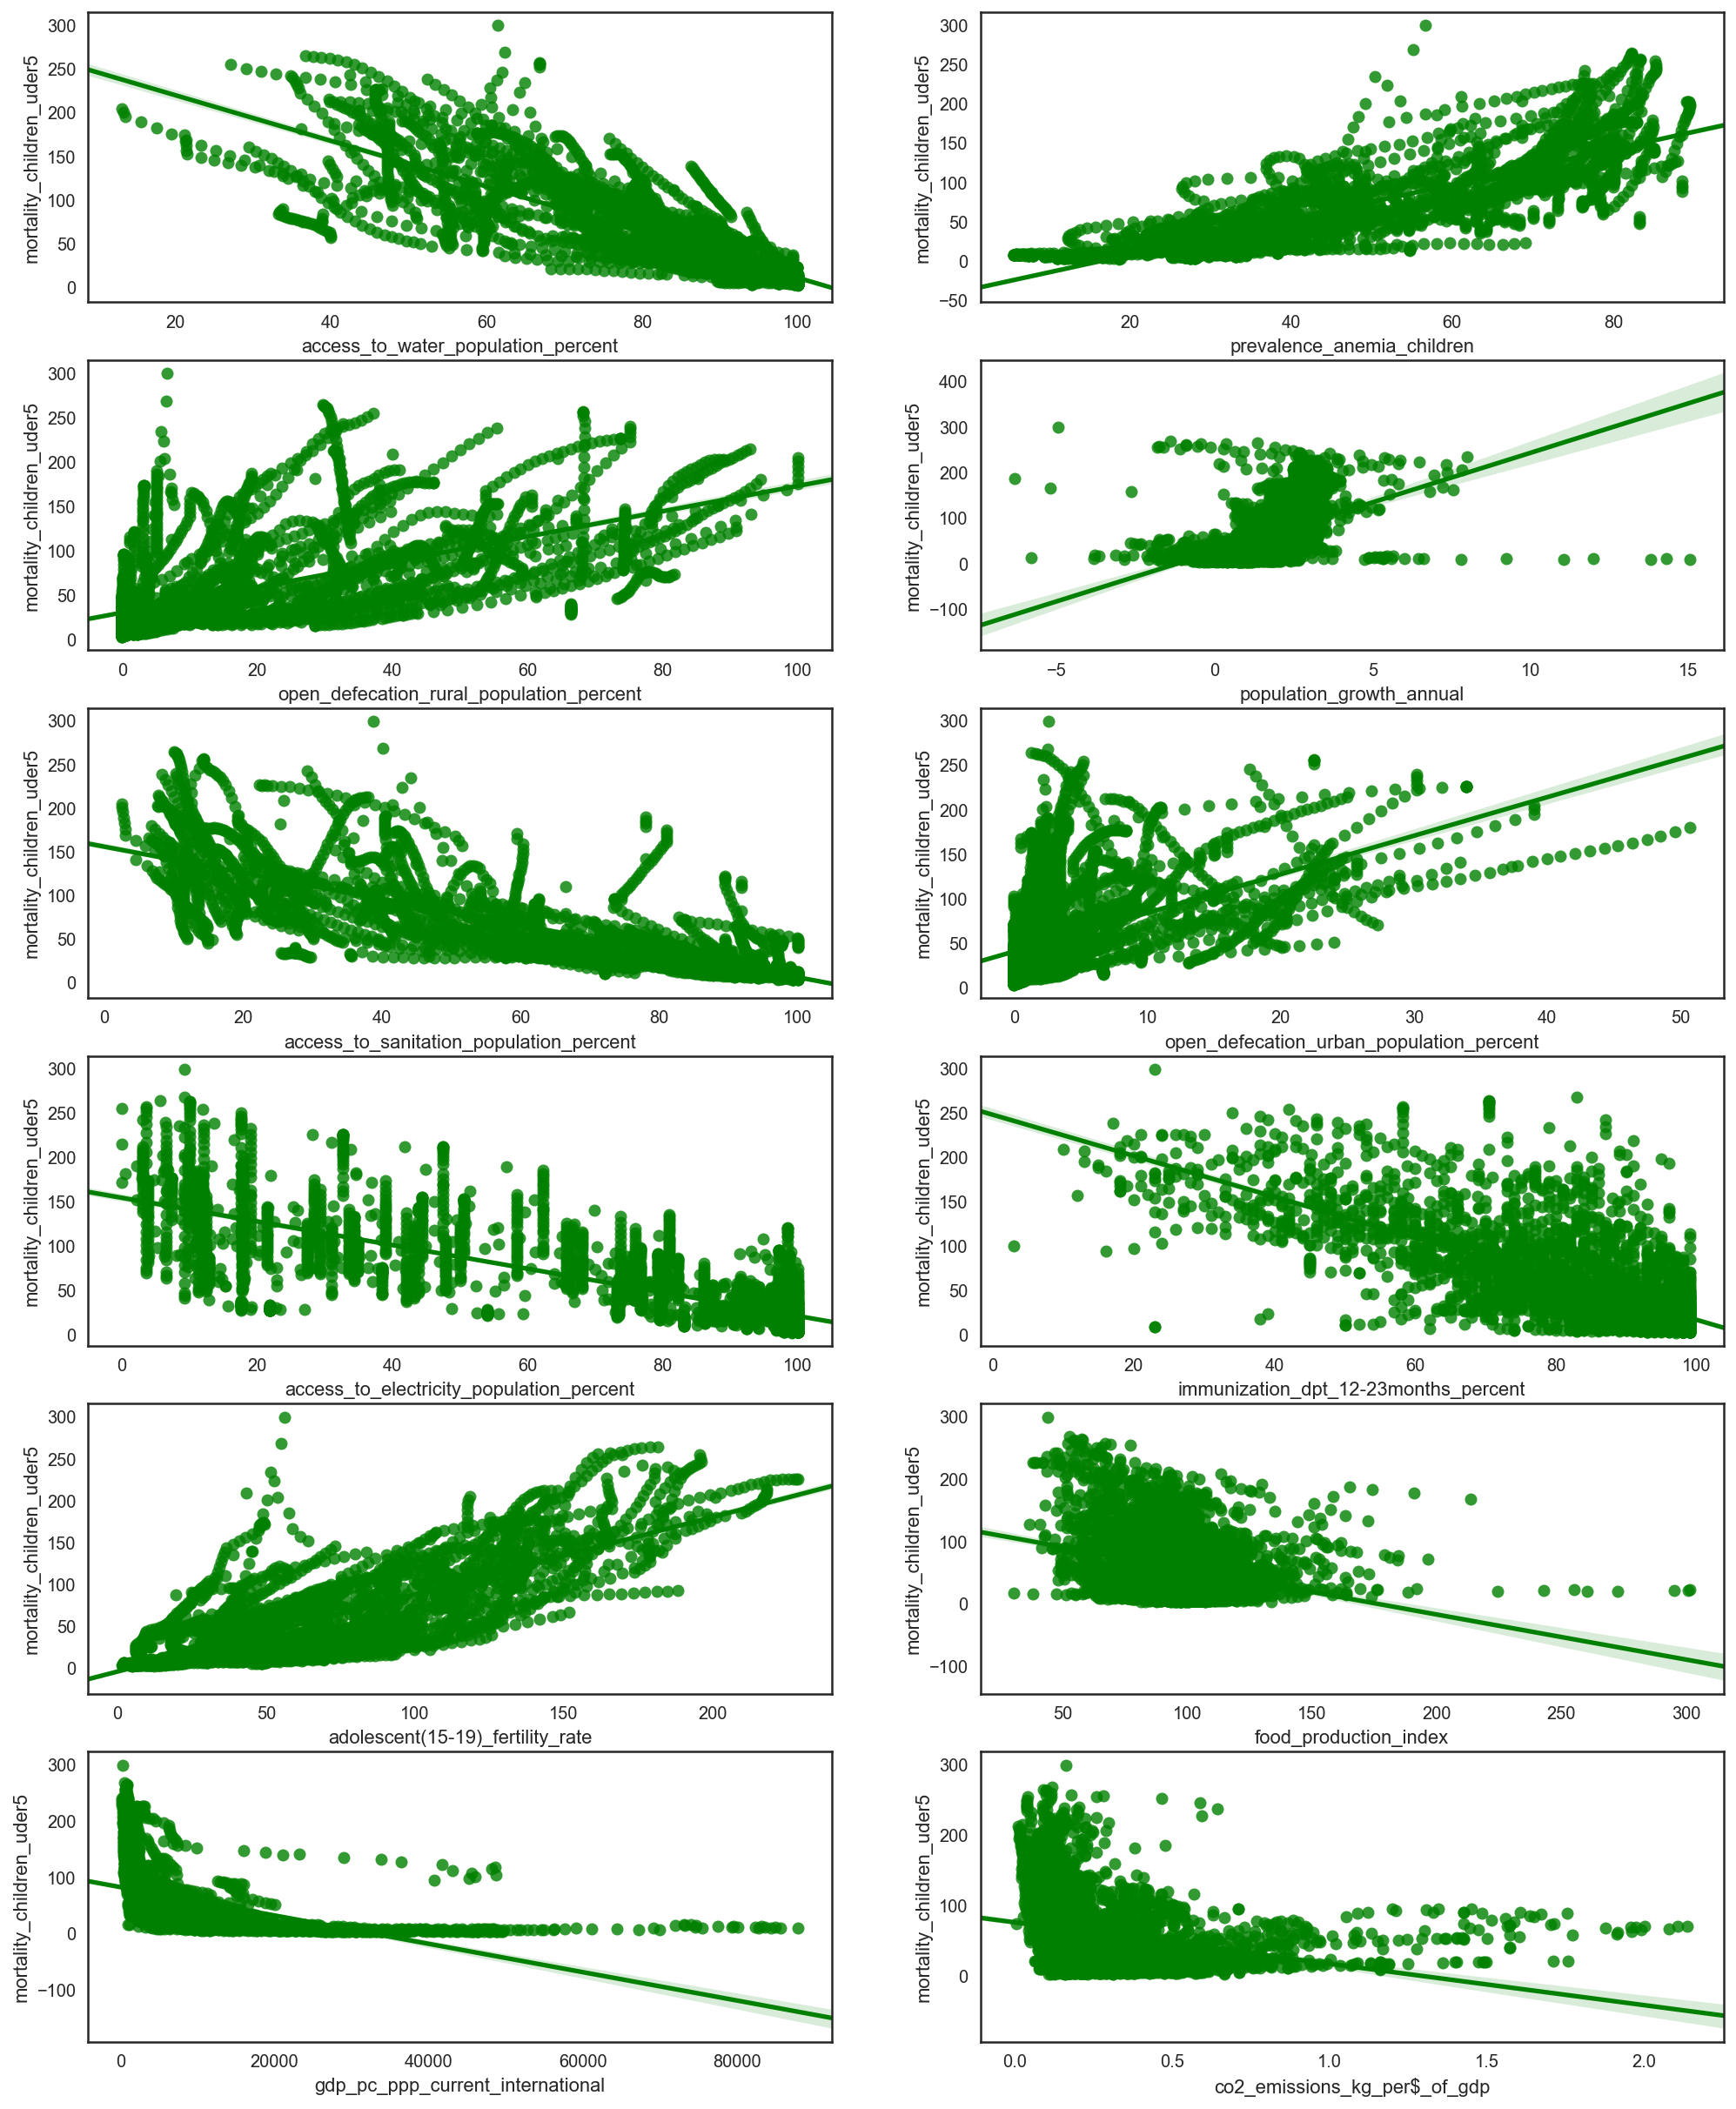

In [125]:
fig, axarr = plt.subplots(6, 2, figsize=(15,20),
                         sharex=False, sharey=False)

axarr[0,0] = sns.regplot(dff.access_to_water_population_percent, dff.mortality_children_uder5, ax=axarr[0,0], color='green')
axarr[0,1] = sns.regplot(dff.prevalence_anemia_children, dff.mortality_children_uder5, ax=axarr[0,1], color='green')     
axarr[1,0] = sns.regplot(dff.open_defecation_rural_population_percent, dff.mortality_children_uder5, ax=axarr[1,0], color='green')
axarr[1,1] = sns.regplot(dff.population_growth_annual, dff.mortality_children_uder5, ax=axarr[1,1], color='green')
axarr[2,0] = sns.regplot(dff.access_to_sanitation_population_percent, dff.mortality_children_uder5, ax=axarr[2,0], color='green')
axarr[2,1] = sns.regplot(dff.open_defecation_urban_population_percent, dff.mortality_children_uder5, ax=axarr[2,1], color='green')
axarr[3,0] = sns.regplot(dff.access_to_electricity_population_percent, dff.mortality_children_uder5, ax=axarr[3,0], color='green')
axarr[3,1] = sns.regplot(dff['immunization_dpt_12-23months_percent'], dff.mortality_children_uder5, ax=axarr[3,1], color='green')
axarr[4,0] = sns.regplot(dff['adolescent(15-19)_fertility_rate'], dff.mortality_children_uder5, ax=axarr[4,0], color='green')
axarr[4,1] = sns.regplot(dff.food_production_index, dff.mortality_children_uder5, ax=axarr[4,1], color='green')
axarr[5,0] = sns.regplot(dff.gdp_pc_ppp_current_international, dff.mortality_children_uder5, ax=axarr[5,0], color='green')
axarr[5,1] = sns.regplot(dff['co2_emissions_kg_per$_of_gdp'], dff.mortality_children_uder5, ax=axarr[5,1], color='green')


plt.show()

#### Here we can see strong relationships between independent variables and dependent variable(child mortality)

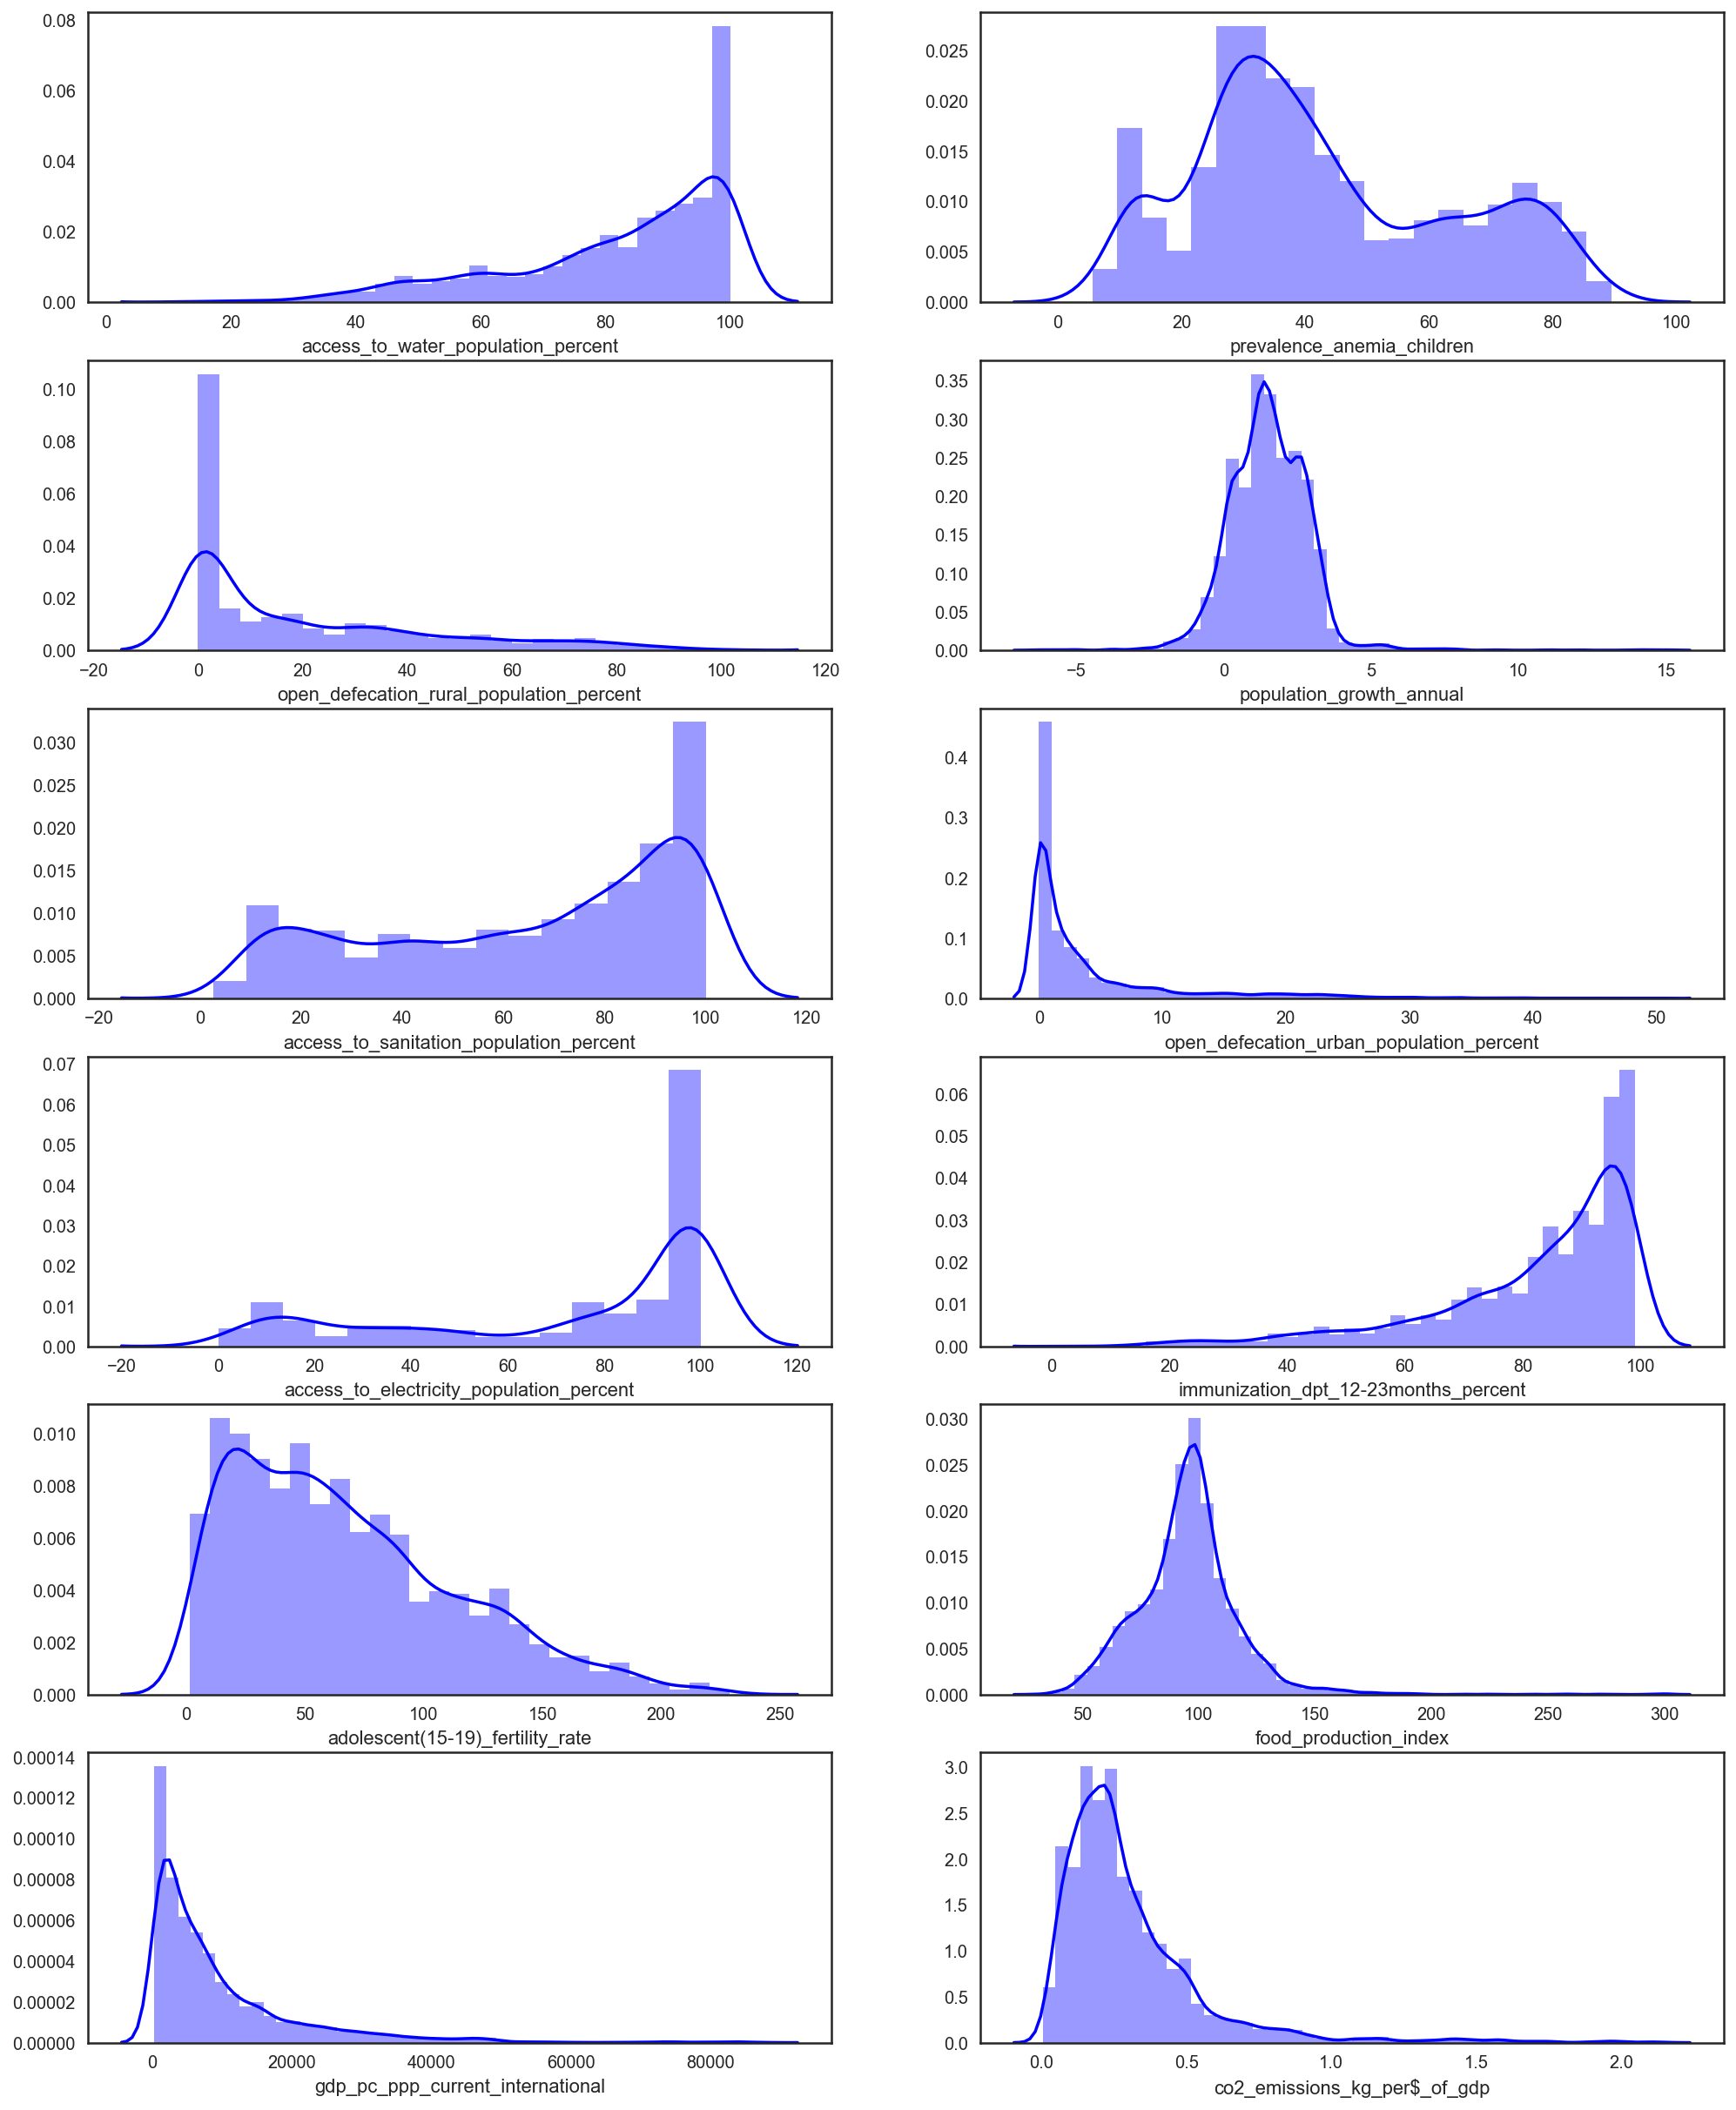

In [132]:
fig, axarr = plt.subplots(6, 2, figsize=(15,20),
                         sharex=False, sharey=False)

axarr[0,0] = sns.distplot(dff.access_to_water_population_percent, ax=axarr[0,0], color='blue')
axarr[0,1] = sns.distplot(dff.prevalence_anemia_children, ax=axarr[0,1], color='blue')     
axarr[1,0] = sns.distplot(dff.open_defecation_rural_population_percent, ax=axarr[1,0], color='blue')
axarr[1,1] = sns.distplot(dff.population_growth_annual,  ax=axarr[1,1], color='blue')
axarr[2,0] = sns.distplot(dff.access_to_sanitation_population_percent,  ax=axarr[2,0], color='blue')
axarr[2,1] = sns.distplot(dff.open_defecation_urban_population_percent, ax=axarr[2,1], color='blue')
axarr[3,0] = sns.distplot(dff.access_to_electricity_population_percent, ax=axarr[3,0], color='blue')
axarr[3,1] = sns.distplot(dff['immunization_dpt_12-23months_percent'],  ax=axarr[3,1], color='blue')
axarr[4,0] = sns.distplot(dff['adolescent(15-19)_fertility_rate'], ax=axarr[4,0], color='blue')
axarr[4,1] = sns.distplot(dff.food_production_index, ax=axarr[4,1], color='blue')
axarr[5,0] = sns.distplot(dff.gdp_pc_ppp_current_international, ax=axarr[5,0], color='blue')
axarr[5,1] = sns.distplot(dff['co2_emissions_kg_per$_of_gdp'], ax=axarr[5,1], color='blue')


plt.show()

# Conclusion

* Variables are not normally distributed, there is a lot of outliers, but we are standardizing them before running any models. Also, this dataset includes global level data, which produces outliers.
* Evaluation of the models is hard or impossible, because of high correlation between independent variables. Unfortunately, the nature of data is such that this problem is hard to overcome. For example, countries with low access to water also have low access to electricity, which is further correlated with lower GDP and so on... This is why I am simply looking for best predictors of child mortality rate and the best predictor is access to water, followed by prevalence of anemia, adolescent fertility rate, CO2 emissions...

In [154]:
dff1 = dff.groupby(['country'])['mortality_children_uder5'].mean()
dff1.sort(ascending=1)
dff1.head()

C:\Users\Boris\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  from ipykernel import kernelapp as app


country
Sweden         4.111538
Korea, Rep.    5.307693
Germany        5.373077
France         5.511539
Italy          5.619231
Name: mortality_children_uder5, dtype: float32

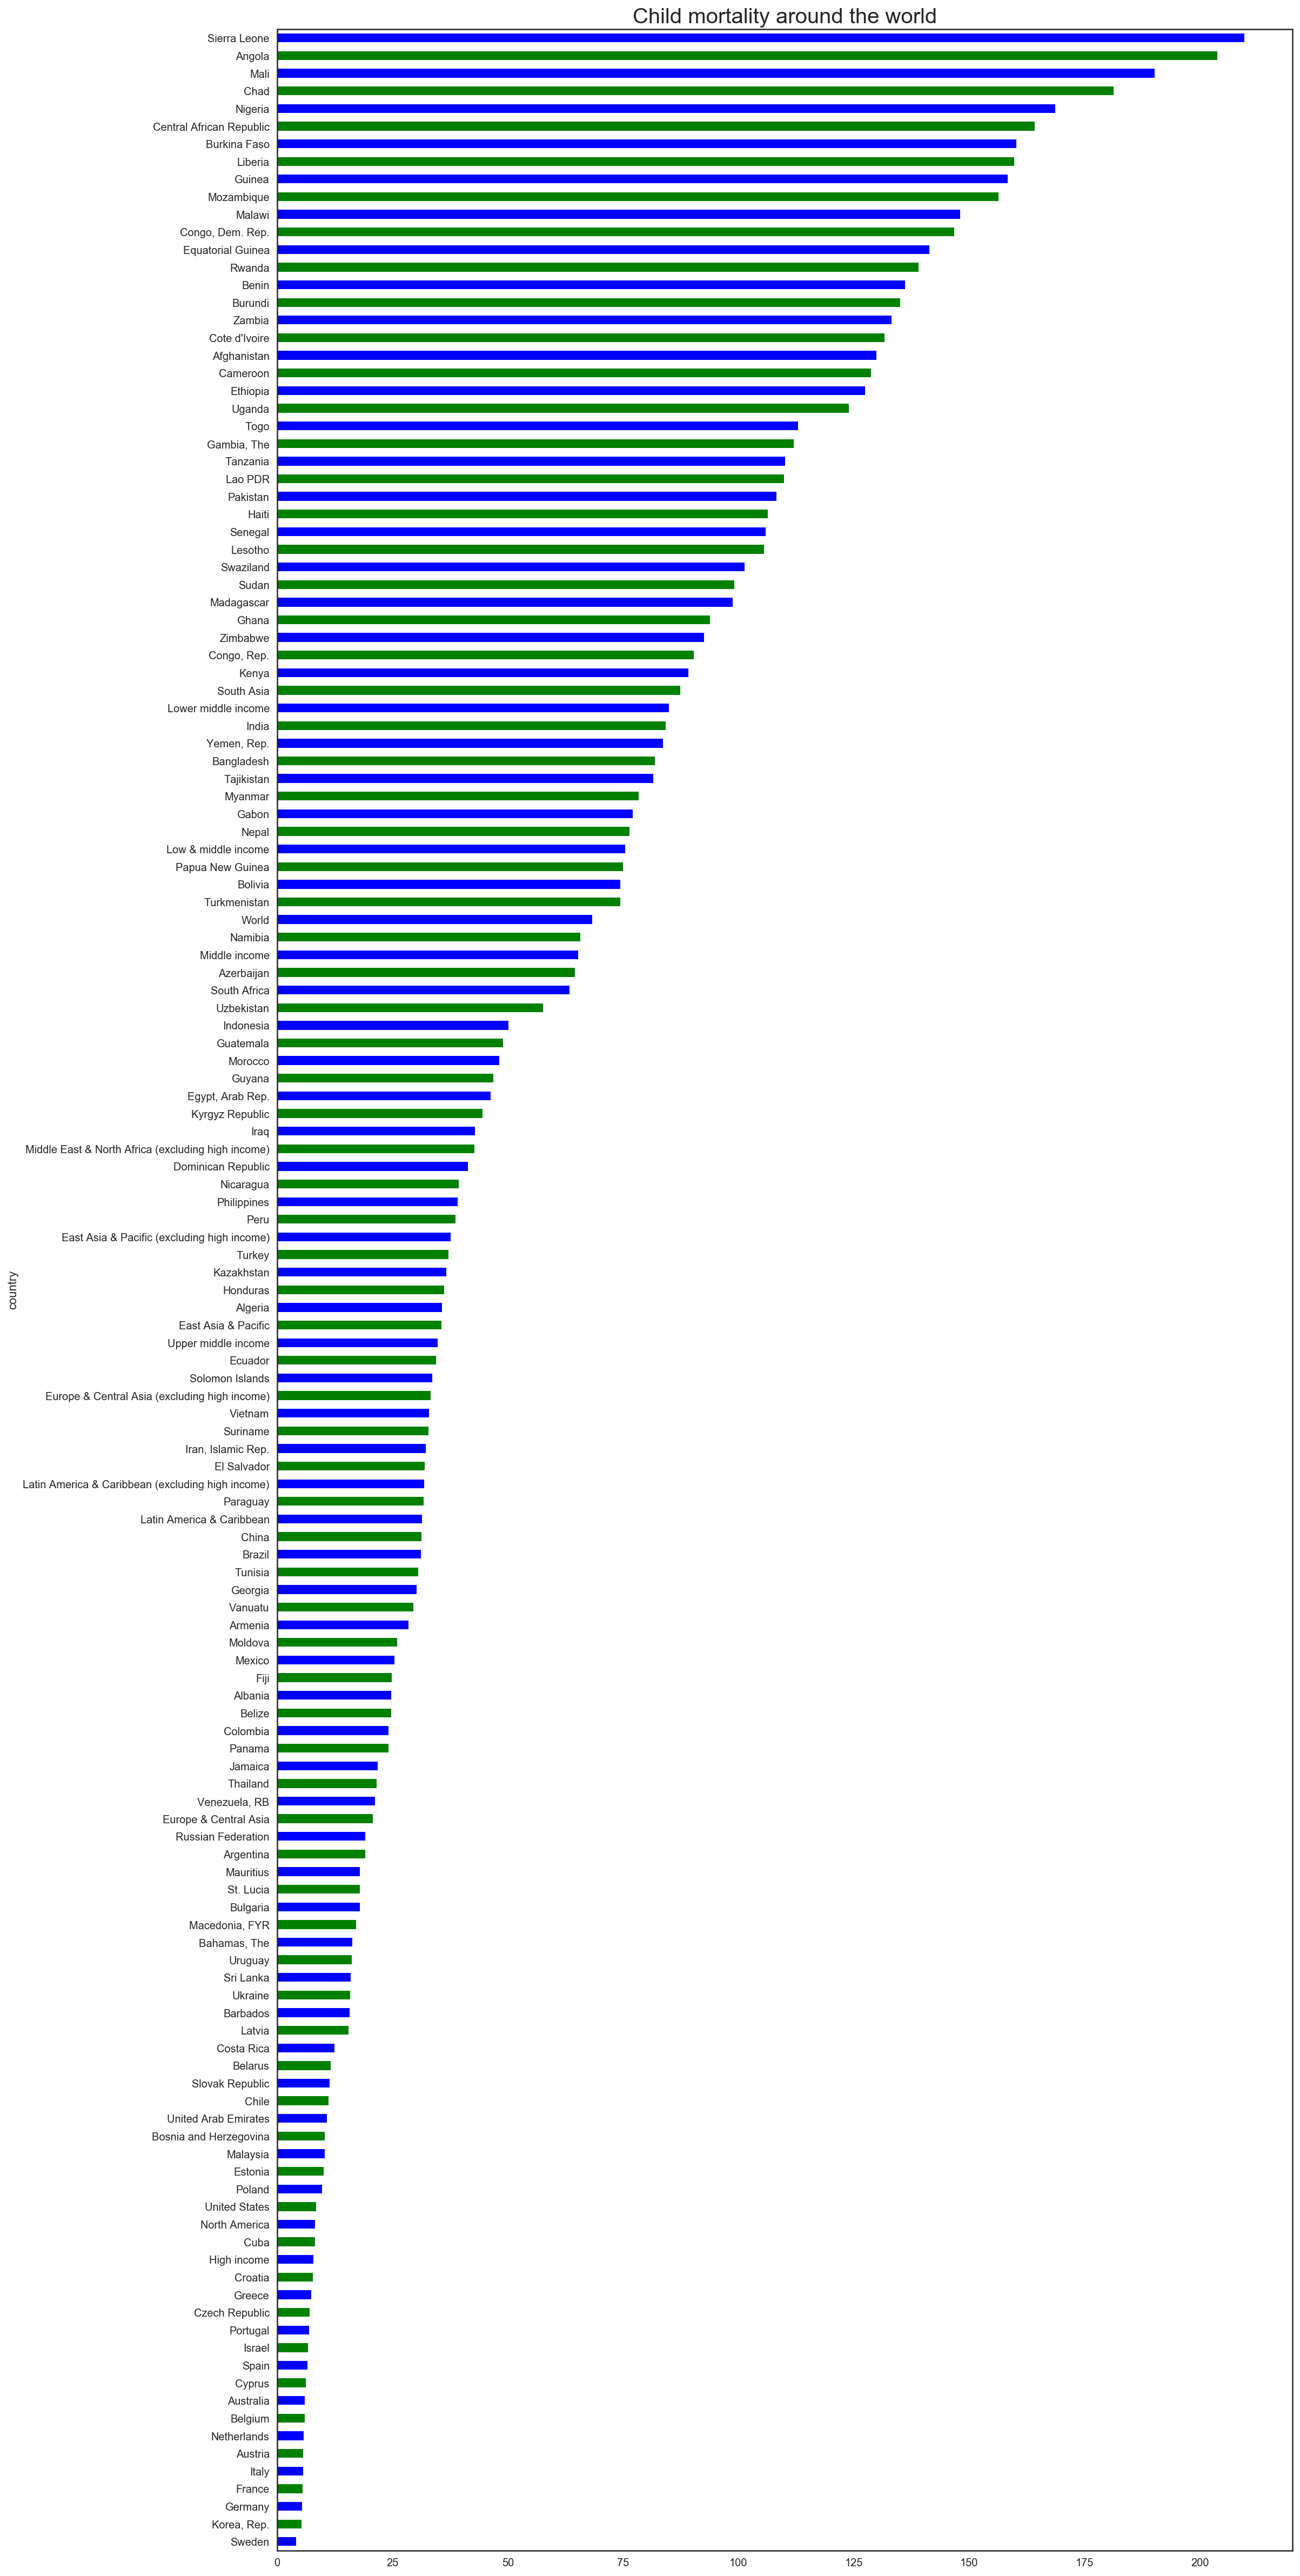

In [155]:
fig = plt.figure(figsize=(15,40))
ax = fig.gca()
dff1.plot(kind="barh", colors=['blue', 'green'], ax=ax)
plt.title('Child mortality around the world', fontsize = 20)
plt.show()